## Goal: parse the Ehux significantly regulated genes as per RSEM

In [857]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import glob
import palettable as pal
import numpy as np
import cPickle as cpk
from itertools import combinations
import numpy as np
from matplotlib import colors

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.sans-serif']='Arial'
%matplotlib inline


In [9]:
gFHash=cpk.load(open('../orthoMCL_output/Ehux_Dictionary.pickle', 'r'))
    

In [10]:
OG_to_Gene_Dict=cpk.load(open('../orthoMCL_output/Ehux_Dictionary.pickle', 'r'))

In [11]:
Hist_PD=pd.DataFrame(index=gFHash.keys(),columns=['NumGenes', 'Emi374', 'Emi379', 'Emi370', 'Emi219', 'Emihu1'])
Hist_PD=Hist_PD.fillna(0)
for i,key in enumerate(gFHash):
#     if i==100:
#         break
    l=len(gFHash[key])
    Hist_PD.loc[key, 'NumGenes']=l
    for transcript in gFHash[key]:
        org=transcript.split('|')[0]
        Hist_PD.loc[key,org]+=1

GenesInOrg={}
GenesInOrg['Emi219']=Hist_PD[Hist_PD.Emi219>0].index
GenesInOrg['Emi379']=Hist_PD[Hist_PD.Emi379>0].index
GenesInOrg['Emi370']=Hist_PD[Hist_PD.Emi370>0].index
GenesInOrg['Emi374']=Hist_PD[Hist_PD.Emi374>0].index
GenesInOrg['Emihu1']=Hist_PD[Hist_PD.Emihu1>0].index
def Calculate_Venn_comparison(hash):
        #input = a Hash of the form hash[Organism]=list of orthologus groups
        #Outputs a hash of the form key = all the variations of thes sets : list of orthologus genes in an inclusive way
        #It is inclusive so the set containing A uniq genes is going to contain all the genes for an org
        variations={}
        for i in range(len(hash)):
            for v in combinations(hash.keys(), i+1):
                vsets = [hash[x] for x in v]
                variations[tuple(sorted(v))]=reduce(lambda x,y: x.intersection(y), vsets)
        return variations
    
def GetDifference_Venn(variations):
    #Function takes the input from the above function and outputs a hash of the same format but 
    #each set is uniqe: e.g. there are no repeats of orthologus groups across sets. 
    outdict={}
    vkeys=variations.keys()
    #loop over each of the variable cases
    for v in variations:
        #create a set to do the comparisons
        vset=set(v)
        vdata_set=set(variations[v])
        #loop over all other variations
        for j in variations:
            #if v is a subset of jset we want to remove the items of jset from v set
            jdata_set=set(variations[j])
            jset=set(j)
            if vset.issubset(jset):
                if vset==jset:
                    pass
                else: 
                    newdata=vdata_set-jdata_set
                    vdata_set=newdata
        outdict[v]=vdata_set
    return outdict

#Get the genes that are unique with in the venn: format of the hash = name of the subset : Orthologus gene groups
Genes_In_Each_Cat=Calculate_Venn_comparison(GenesInOrg)
Genes_Uniq_Venn=GetDifference_Venn(Genes_In_Each_Cat)

## Import the RSEM files for gene and isoform data

In [916]:
##Import the RSEM Files for gene families
files=glob.glob("edgeR.18185.dir/*DE_results")
RSEM_Gene_Hash={}
for f in files:
    name=f.split('.')[5]
    out=pd.read_table(f)
    RSEM_Gene_Hash[name]=out

In [917]:
files=glob.glob("edgeR.18268.dir/*DE_results")
RSEM_Isoform_Hash={}
for f in files:
    name=f.split('.')[5]
    out=pd.read_table(f)
    RSEM_Isoform_Hash[name]=out

In [14]:
RSEM_Isoform_Hash['Q_con_vs_R_PlusN']

,logFC,logCPM,PValue,FDR
Emihu1|79084,-12.675156,13.385938,2.921392e-17,2.081053e-12
Emi370|CAMPEP_0187711222,-13.232739,9.233428,1.547082e-12,5.510321e-08
Emi370|CAMPEP_0187711574,12.276359,8.304311,7.523978e-10,1.786569e-05
Emi370|CAMPEP_0187711614,11.810624,7.847344,3.938249e-09,7.013530e-05
Emihu1|434417,11.358933,7.407022,1.386889e-08,1.975901e-04
Emihu1|79617,-6.805823,7.204446,2.001598e-08,2.247530e-04
Emi374|CAMPEP_0187606548,11.356965,7.405175,2.208565e-08,2.247530e-04
Emi379|CAMPEP_0187653602,11.188026,7.241295,4.363690e-08,3.885593e-04
Emi374|CAMPEP_0187598980,10.914963,6.977923,7.151557e-08,4.868513e-04
Emi379|CAMPEP_0187637972,11.050669,7.108566,7.249465e-08,4.868513e-04


In [15]:
RSEM_Gene_Stats=pd.DataFrame(index=RSEM_Gene_Hash.keys(), columns=['Total', 'DE'])
for key in RSEM_Gene_Hash.keys():
    total=len(RSEM_Gene_Hash[key])
    DE=len(RSEM_Gene_Hash[key][RSEM_Gene_Hash[key]['FDR']<0.05])
    RSEM_Gene_Stats.loc[key,:]=[total, DE]

In [16]:
RSEM_Isoform_Stats=pd.DataFrame(index=RSEM_Isoform_Hash.keys(), columns=['Total', 'DE'])
for key in RSEM_Isoform_Hash.keys():
    total=len(RSEM_Isoform_Hash[key])
    DE=len(RSEM_Isoform_Hash[key][RSEM_Isoform_Hash[key]['FDR']<0.05])
    RSEM_Isoform_Stats.loc[key,:]=[total, DE]

(0, 2000)

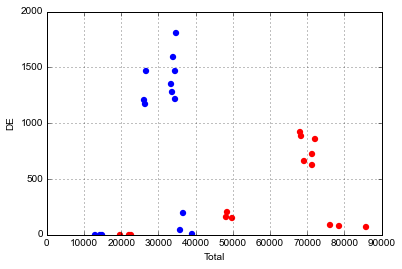

In [17]:
RSEM_Gene_Stats['DE']/RSEM_Gene_Stats['Total']
fig,ax=plt.subplots(1)
RSEM_Gene_Stats.plot(kind='scatter', x='Total', y='DE', ax=ax, lw=0, s=40)
RSEM_Isoform_Stats.plot(kind='scatter', x='Total', y='DE', ax=ax, c='r',lw=0, s=40)
ax.set_ylim([0,2000])
### LOoks like the plots cluster together based on what is being compared!  Prettttttyy cool. 

In [18]:
len(RSEM_Gene_Hash['Q_con_vs_R_PlusN'])

34362

Q_con_vs_T_MinusN
Q_con_vs_V_MinusP
Q_con_vs_R_PlusN
Q_con_vs_S_PlusP
Q_con_vs_X_PlusDSW


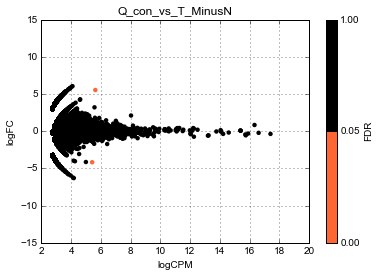

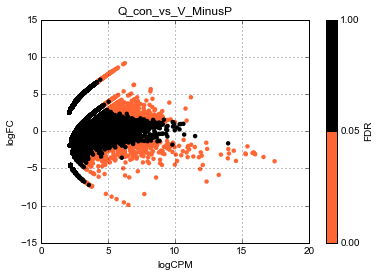

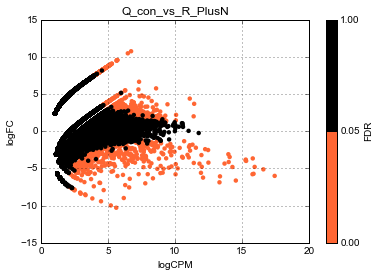

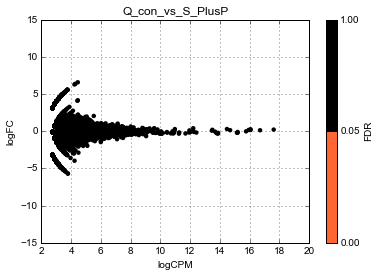

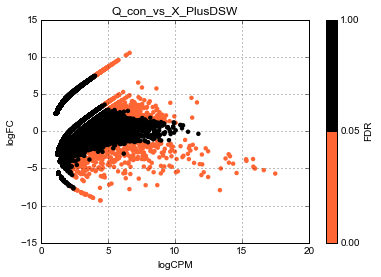

In [19]:
##Plot genes that are significant based on 0.05 FDR in comparisons with Q

cmap = plt.cm.gray_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1,.4,.2,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = (0,0.05,1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for key in RSEM_Gene_Hash.keys():
    if 'Q' in key:
        ax=RSEM_Gene_Hash[key].plot(kind='scatter', x='logCPM', y='logFC',c='FDR',cmap=cmap, norm=norm, lw=0, ylim=[-15,15])
        
        ax.set_title(key)

        print(key)

Q_con_vs_T_MinusN
Q_con_vs_V_MinusP
Q_con_vs_R_PlusN
Q_con_vs_S_PlusP
Q_con_vs_X_PlusDSW


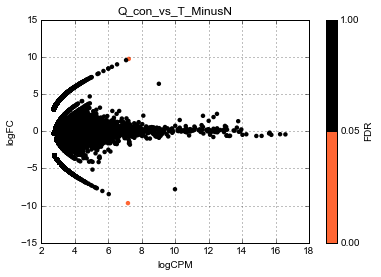

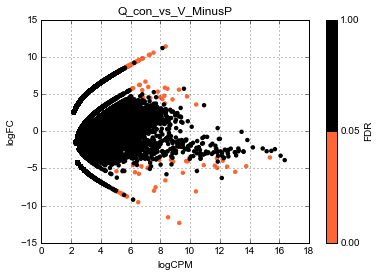

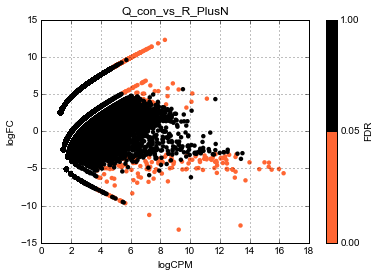

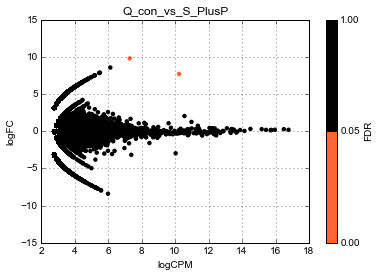

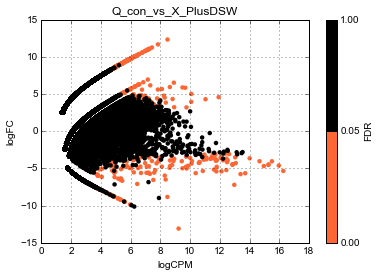

In [20]:
##Plot genes that are significant based on 0.05 FDR in comparisons with Q

cmap = plt.cm.gray_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1,.4,.2,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = (0,0.05,1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for key in RSEM_Isoform_Hash.keys():
    if 'Q' in key:
        ax=RSEM_Isoform_Hash[key].plot(kind='scatter', x='logCPM', y='logFC',c='FDR',cmap=cmap, norm=norm, lw=0, ylim=[-15,15])
        
        ax.set_title(key)

        print(key)

In [21]:
def Comp_OG_Iso_Sig(geneSet):
    #Function to compare core genes for Ehux OGs and Isoforms significance of regulation
    OG_RSEM=RSEM_Gene_Hash[geneSet]
    Iso_RSEM=RSEM_Isoform_Hash[geneSet]
    #first look at core genes
    outDF=pd.DataFrame(columns=['OG', 'Emihu1','Emi219', 'Emi370', 'Emi374', 'Emi379'], index=OG_RSEM.index)
    for OG in Genes_In_Each_Cat[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')]:
        IsoList=gFHash[OG]
        if OG in OG_RSEM.index:
            OG_Sig=(OG_RSEM.loc[OG].FDR < 0.05)
            if OG_Sig: 
                OG_UpDn=np.sign(OG_RSEM.loc[OG].logFC)
            else:
                OG_UpDn=0
            outDF.loc[OG, 'OG']=OG_UpDn
            for iso in IsoList:
                specName=iso.split("|")[0]
                if iso in Iso_RSEM.index:
                    Iso_Sig=(Iso_RSEM.loc[iso].FDR < 0.05)
                    if Iso_Sig: 
                        Iso_UpDn=np.sign(Iso_RSEM.loc[iso].logFC)
                    else:
                        Iso_UpDn=0
                    if outDF.loc[OG,specName]!=1|-1:
                        outDF.loc[OG, specName]=Iso_UpDn
    return outDF


                    
QvR_Comp_Core=Comp_OG_Iso_Sig('Q_con_vs_R_PlusN')
QvV_Comp_Core=Comp_OG_Iso_Sig('Q_con_vs_V_MinusP')
QvX_Comp_Core=Comp_OG_Iso_Sig('Q_con_vs_X_PlusDSW')

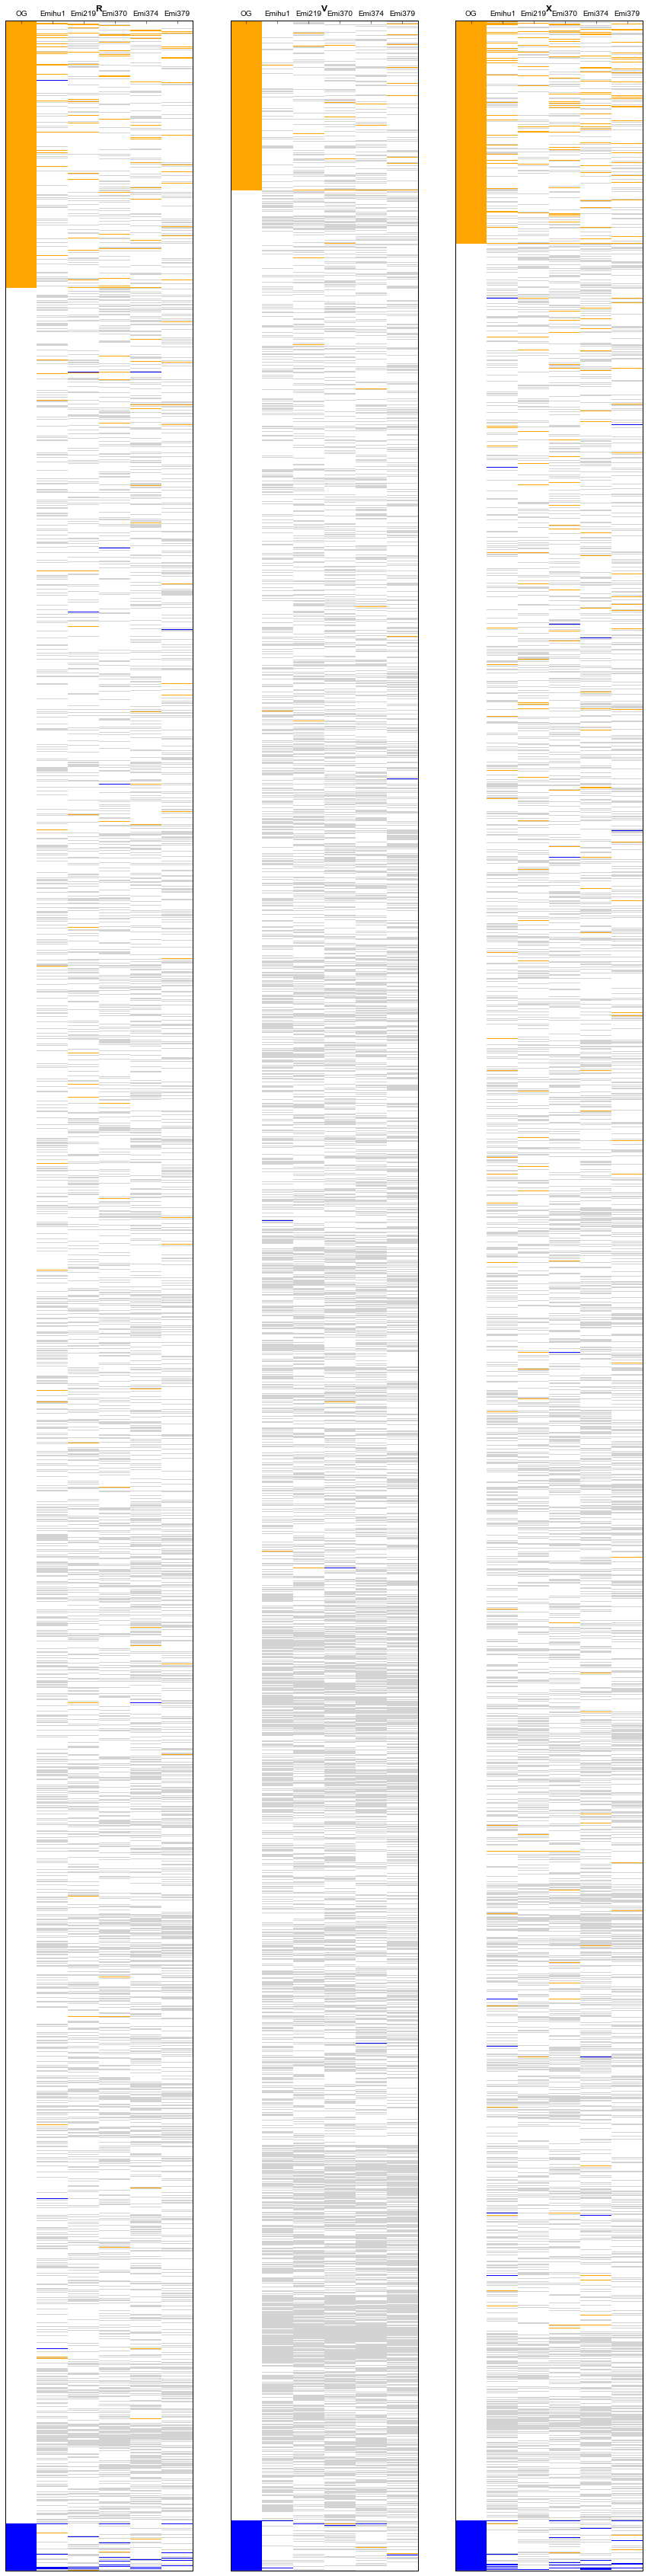

In [2055]:
import matplotlib.colors as colors
def PlotComparison(ComparisonOGIsoSig,ax):
    df=ComparisonOGIsoSig.dropna(how='all').sort('OG', ascending=False)
    df=df.fillna(-2)
    ax.margins(0,0)
    cmap = colors.ListedColormap(['lightgrey', 'blue', 'white', 'orange'])
    ax.imshow(df, interpolation='none', aspect='auto', origin='upper', cmap=cmap, vmin=-2, vmax=1)
    ax.set_xticks(np.arange(0, len(df.columns), 1))
    ax.set_xticklabels(df.columns, rotation=90)
    ax.xaxis.set_ticks_position('top')
    ax.set_yticks([])
    return df

fig, ax=plt.subplots(1,3)
fig.set_size_inches(15, 3000/50)
PlotComparison(QvR_Comp_Core, ax[0])
PlotComparison(QvV_Comp_Core, ax[1])
PlotComparison(QvX_Comp_Core, ax[2])
ax[0].set_title('R', y=1.002,weight='bold')
ax[1].set_title('V',y=1.002, weight='bold')
ax[2].set_title('X',y=1.002, weight='bold')



In [37]:
def Comp_OG_Iso_Sig(geneSet):
    #Function to compare core genes for Ehux OGs and Isoforms significance of regulation
    OG_RSEM=RSEM_Gene_Hash[geneSet]
    Iso_RSEM=RSEM_Isoform_Hash[geneSet]
    #first look at core genes
    outDF=pd.DataFrame(columns=['OG', 'Emihu1','Emi219', 'Emi370', 'Emi374', 'Emi379'], index=OG_RSEM.index)
    for OG in OG_RSEM.index:
        IsoList=gFHash[OG]
        OG_Sig=(OG_RSEM.loc[OG].FDR < 0.05)
        if OG_Sig: 
            OG_UpDn=np.sign(OG_RSEM.loc[OG].logFC)
        else:
            OG_UpDn=0
        outDF.loc[OG, 'OG']=OG_UpDn
        for iso in IsoList:
            specName=iso.split("|")[0]
            if iso in Iso_RSEM.index:
                Iso_Sig=(Iso_RSEM.loc[iso].FDR < 0.05)
                if Iso_Sig: 
                    Iso_UpDn=np.sign(Iso_RSEM.loc[iso].logFC)
                else:
                    Iso_UpDn=0
                if outDF.loc[OG,specName]!=1|-1:
                    outDF.loc[OG, specName]=Iso_UpDn
    return outDF


                    
QvR_Comp_all=Comp_OG_Iso_Sig('Q_con_vs_R_PlusN')
QvV_Comp_all=Comp_OG_Iso_Sig('Q_con_vs_V_MinusP')
QvX_Comp_all=Comp_OG_Iso_Sig('Q_con_vs_X_PlusDSW')

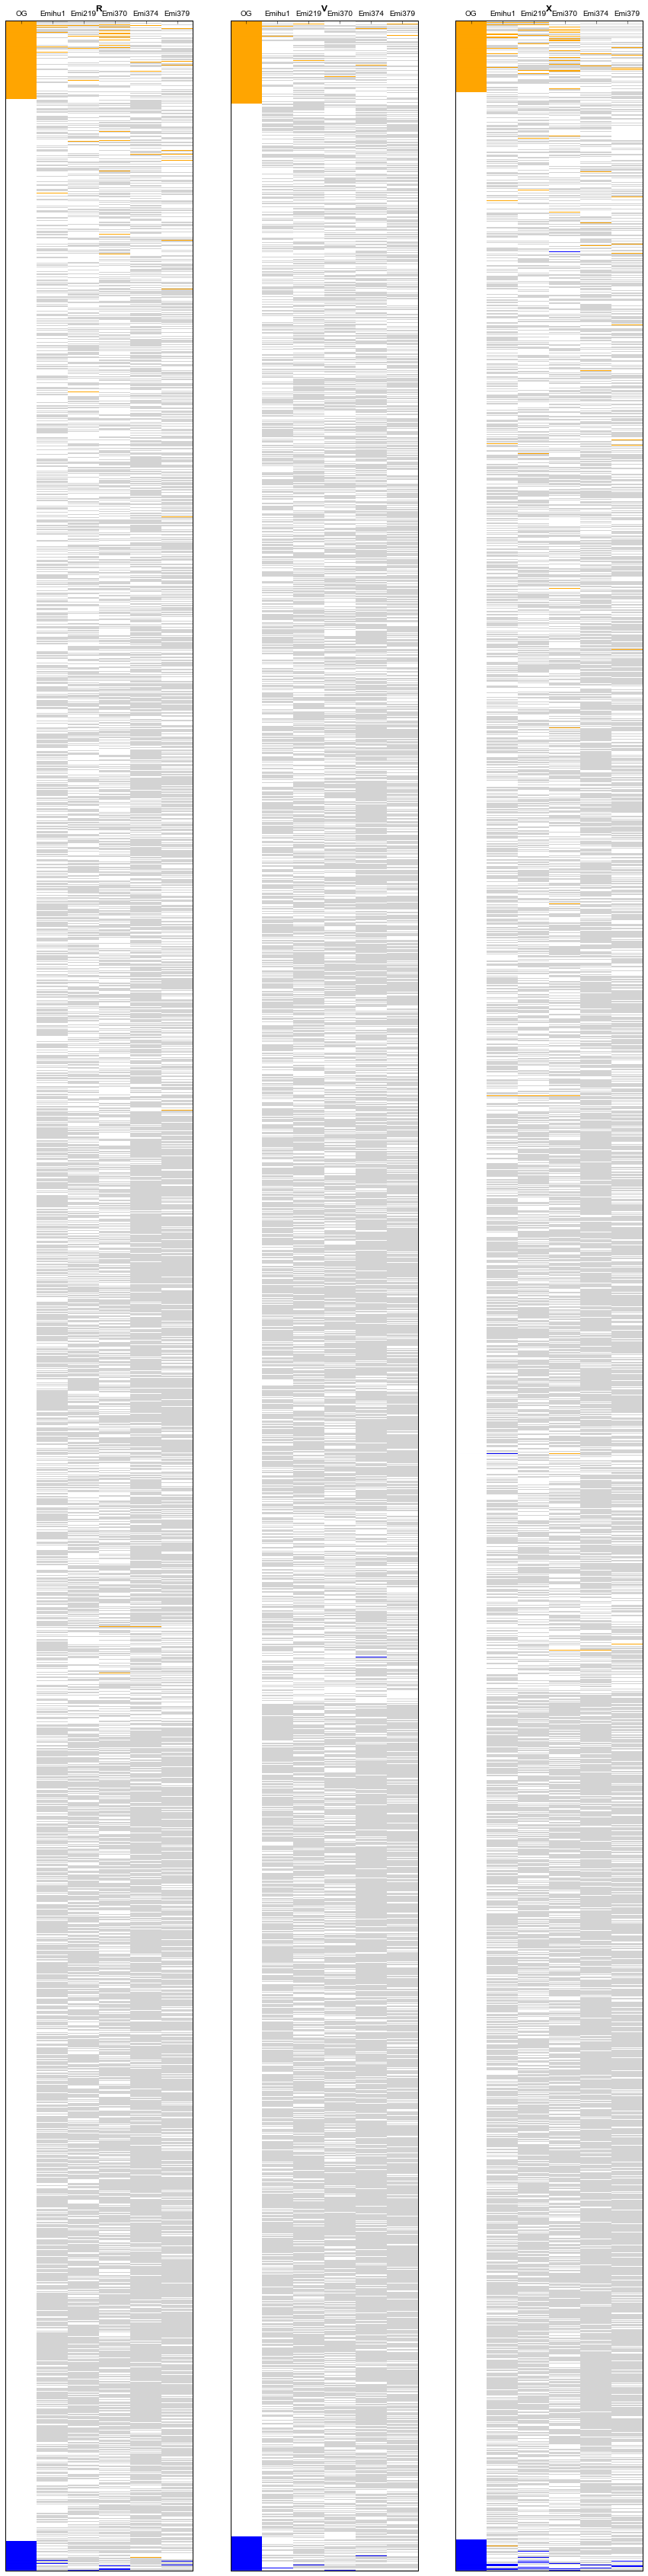

In [38]:
fig, ax=plt.subplots(1,3)
fig.set_size_inches(15, 3000/50)
PlotComparison(QvR_Comp_all, ax[0])
PlotComparison(QvV_Comp_all, ax[1])
PlotComparison(QvX_Comp_all, ax[2])
ax[0].set_title('R', y=1.002,weight='bold')
ax[1].set_title('V',y=1.002, weight='bold')
ax[2].set_title('X',y=1.002, weight='bold')


In [23]:
files=glob.glob("edgeR.18268.dir/*DE_results")
RSEM_Transcript_Hash={}
for f in files:
    name=f.split('.')[5]
    out=pd.read_table(f)
    RSEM_Transcript_Hash[name]=out

In [24]:
test=RSEM_Gene_Hash['Q_con_vs_R_PlusN']

RSEM_Transcript_Stats=pd.DataFrame(index=RSEM_Gene_Hash.keys(), columns=['Total', 'DE'])
for key in RSEM_Transcript_Hash.keys():
    total=len(RSEM_Transcript_Hash[key])
    DE=len(RSEM_Transcript_Hash[key][RSEM_Transcript_Hash[key]['FDR']<0.05])
    RSEM_Transcript_Stats.loc[key,:]=[total, DE]

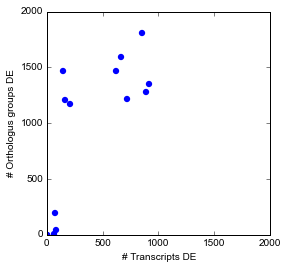

In [25]:
fig,ax=plt.subplots(1)
ax.set_aspect('equal')
ax.scatter(RSEM_Transcript_Stats['DE'], RSEM_Gene_Stats['DE'], lw=0,s=40)
ax.set_xlim([0,2000])
ax.set_ylim([0,2000])
ax.set_xlabel('# Transcripts DE')
ax.set_ylabel('# Orthologus groups DE')

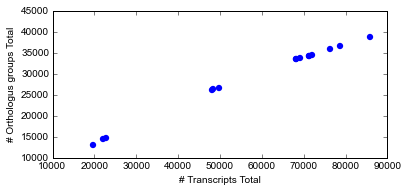

In [26]:
fig,ax=plt.subplots(1)
ax.set_aspect('equal')
ax.scatter(RSEM_Transcript_Stats['Total'], RSEM_Gene_Stats['Total'], lw=0, s=40)
ax.set_xlabel('# Transcripts Total')
ax.set_ylabel('# Orthologus groups Total')

In [27]:
for name in RSEM_Transcript_Stats.index:
    RSEM_Transcript_Stats.loc[name,'Con1']=name.split('_')[0]
    RSEM_Transcript_Stats.loc[name,'Con2']=name.split('_')[3]
    RSEM_Gene_Stats.loc[name,'Con1']=name.split('_')[0]
    RSEM_Gene_Stats.loc[name,'Con2']=name.split('_')[3]

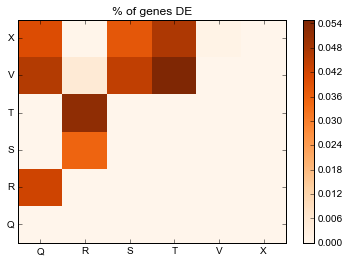

In [28]:
def PlotHeatmap(df,df2=None, ax=None):
    if ax ==None:
        fig,ax = plt.subplots(1)
    exps=['Q','R','S','T','V', 'X']
    hm=pd.DataFrame(index=exps, columns=exps,dtype='float')
#     for i,ex in enumerate(exps):
#         for j,ex2 in enumerate(exps):
#             print df[((df['Con1']==i)&(df['Con2']==j))]
# #             hm.loc[i,j]=
    df=df.sort(['Con1', 'Con2'])
    for i in df.index:
        ci=df.loc[i,'Con1']
        cr=df.loc[i,'Con2']
        hm.loc[cr,ci]=float(df.loc[i,'DE'])/float(df.loc[i,'Total'])
    if df2!=None:

        for i in df2.index:
            cr=df2.loc[i,'Con1']
            ci=df2.loc[i,'Con2']
            hm.loc[cr,ci]=df2.loc[i,'DE']
    hm=hm.astype('float')
    hm=hm.fillna(0)
    cplot=ax.pcolor(hm,cmap=pal.colorbrewer.sequential.Oranges_9.get_mpl_colormap())
    ax.set_xticks(np.arange(0.5,5.6, 1))
    ax.set_yticks(np.arange(0.5,5.6, 1))
    ax.set_yticklabels(exps)
    ax.set_xticklabels(exps)
    cbar=fig.colorbar(cplot)
    ax.set_title('% of genes DE')
PlotHeatmap(RSEM_Gene_Stats)


## Look at the gene content within genes that are DE with N addition

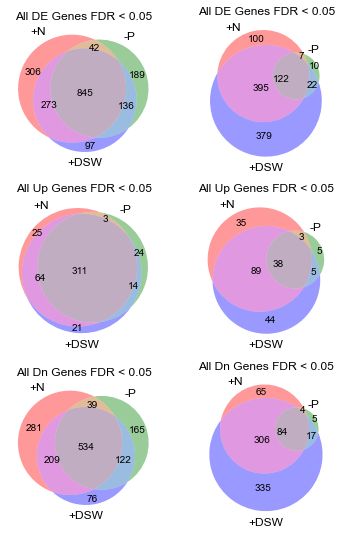

In [1953]:
#All differentially regulated genes
from matplotlib_venn import venn3

QR=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
QV=RSEM_Gene_Hash['Q_con_vs_V_MinusP']
QX=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']

QR_Sig_Set=set(QR[QR.FDR<0.05].index)
QV_Sig_Set=set(QV[QV.FDR<0.05].index)
QX_Sig_Set=set(QX[QX.FDR<0.05].index)

fig,axs=plt.subplots(3,2)
fig.set_size_inches(6,9)
ax=axs[0][0]
venn3([QR_Sig_Set, QV_Sig_Set, QX_Sig_Set], set_labels=['+N','-P', '+DSW'],ax=ax)
ax.set_title('All DE Genes FDR < 0.05')

Up_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC<0)].index)
Up_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC<0)].index)
Up_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC<0)].index)

ax=axs[1][0]
venn3([Up_R_Q, Up_V_Q, Up_X_Q], set_labels=['+N','-P', '+DSW'], ax=ax)
ax.set_title('All Up Genes FDR < 0.05')


Dn_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC>0)].index)
Dn_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC>0)].index)
Dn_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC>0)].index)

ax=axs[2][0]
venn3([Dn_R_Q, Dn_V_Q, Dn_X_Q], set_labels=['+N','-P', '+DSW'], ax=ax)
ax.set_title('All Dn Genes FDR < 0.05')



QR=RSEM_Isoform_Hash['Q_con_vs_R_PlusN']
QV=RSEM_Isoform_Hash['Q_con_vs_V_MinusP']
QX=RSEM_Isoform_Hash['Q_con_vs_X_PlusDSW']

QR_Sig_Set=set(QR[QR.FDR<0.05].index)
QV_Sig_Set=set(QV[QV.FDR<0.05].index)
QX_Sig_Set=set(QX[QX.FDR<0.05].index)

ax=axs[0][1]
venn3([QR_Sig_Set, QV_Sig_Set, QX_Sig_Set], set_labels=['+N','-P', '+DSW'],ax=ax)
ax.set_title('All DE Genes FDR < 0.05')

Up_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC<0)].index)
Up_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC<0)].index)
Up_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC<0)].index)

ax=axs[1][1]
venn3([Up_R_Q, Up_V_Q, Up_X_Q], set_labels=['+N','-P', '+DSW'], ax=ax)
ax.set_title('All Up Genes FDR < 0.05')

Dn_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC>0)].index)
Dn_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC>0)].index)
Dn_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC>0)].index)

ax=axs[2][1]
venn3([Dn_R_Q, Dn_V_Q, Dn_X_Q], set_labels=['+N','-P', '+DSW'],ax=ax)
ax.set_title('All Dn Genes FDR < 0.05')

fig.savefig('../Figures/Venn_DEGenes.pdf')

### Look at distribution of the genes across different functional groups

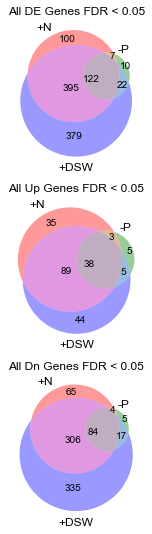

In [1945]:
QR=RSEM_Isoform_Hash['Q_con_vs_R_PlusN']
QV=RSEM_Isoform_Hash['Q_con_vs_V_MinusP']
QX=RSEM_Isoform_Hash['Q_con_vs_X_PlusDSW']

QR_Sig_Set=set(QR[QR.FDR<0.05].index)
QV_Sig_Set=set(QV[QV.FDR<0.05].index)
QX_Sig_Set=set(QX[QX.FDR<0.05].index)

fig,axs=plt.subplots(3)
fig.set_size_inches(3,9)

ax=axs[0]
venn3([QR_Sig_Set, QV_Sig_Set, QX_Sig_Set], set_labels=['+N','-P', '+DSW'],ax=ax)
ax.set_title('All DE Genes FDR < 0.05')

Up_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC<0)].index)
Up_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC<0)].index)
Up_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC<0)].index)

ax=axs[1]
venn3([Up_R_Q, Up_V_Q, Up_X_Q], set_labels=['+N','-P', '+DSW'], ax=ax)
ax.set_title('All Up Genes FDR < 0.05')

Dn_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC>0)].index)
Dn_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC>0)].index)
Dn_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC>0)].index)

ax=axs[2]
venn3([Dn_R_Q, Dn_V_Q, Dn_X_Q], set_labels=['+N','-P', '+DSW'],ax=ax)
ax.set_title('All Dn Genes FDR < 0.05')

Potentially have a different strain coming up in the -P condition between the two experiments? Could be a reason for fewer DE transcripts. 

## Targeting P and N genes

Using the genome strain N/P genes as a basis for these analyses



In [31]:
def invertDict(inhash):
    #Invert the key/value pairs in a dictionary
    outhash={}
    for key in inhash:
        for value in inhash[key]:
            outhash[value]=key
    return outhash
Genes_Uniq_Venn_inv=invertDict(Genes_Uniq_Venn)
gFHash_inv=invertDict(gFHash)

In [2192]:
def importGeneList(infile):
    handle=open(infile, 'rw')
    outList=[]
    for line in handle:
        geneName="Emihu1|"+line.strip()
        outList.append(geneName)
    outSet=set(outList)
    return outSet

Pgenes=importGeneList("McKewGenesTargets/Phosphate.tab")
Ngenes=importGeneList("McKewGenesTargets/Nitrogen.tab")
Ureagenes=importGeneList("McKewGenesTargets/UreaCycle.tab")
VitaminGenes=importGeneList("McKewGenesTargets/Vitamin.tab")
Sgenes=importGeneList("McKewGenesTargets/Suphur.tab")
Calgenes=importGeneList("McKewGenesTargets/Calcification.tab")
AminoAcid=importGeneList("McKewGenesTargets/AminoAcid.tab")
Nucleotide=importGeneList("McKewGenesTargets/Nucleotide.tab")
ATPGenes=importGeneList("McKewGenesTargets/ATP_synth.tab")
LHCGenes=importGeneList("McKewGenesTargets/LightHarvesting.tab")
CalvinGenes=importGeneList("McKewGenesTargets/Calvin.tab")
GlycGenes=importGeneList("McKewGenesTargets/Glycolysis.tab")
TCAGenes=importGeneList("McKewGenesTargets/TCA.tab")
LipidGenes=importGeneList('McKewGenesTargets/Lipids.tab')

In [976]:
def geneSetToOGDict(GeneList):
    #Get the OG associated with each of the EmiHu1 genes listed
    OGList=[]
    for p in GeneList:  
        if p in gFHash_inv:
            OG=gFHash_inv[p]
        print OG,'\t',p 

geneSetToOGDict(Ureagenes)

OG1_5_4596 	Emihu1|434747
OG1_5_5714 	Emihu1|423772
OG1_5_1089 	Emihu1|422007
OG1_5_14076 	Emihu1|102483
OG1_5_3365 	Emihu1|465437
OG1_5_3365 	Emihu1|456474
OG1_5_14076 	Emihu1|240308
OG1_5_1089 	Emihu1|463837
OG1_5_2699 	Emihu1|204139
OG1_5_3099 	Emihu1|441299


In [855]:
def geneSetToOG(GeneList):
    #Get the OG associated with each of the EmiHu1 genes listed
    OGList=[]
    for p in GeneList:   
        if p in gFHash_inv:

            OG=gFHash_inv[p]
            OGList.append(OG)
    OGSet=set(OGList)
    return OGSet

def PlotComparison_GeneSet(ComparisonOGIsoSig,ax, GeneList):
    #Create a heat map for the significance of regulation for each of the OG and look at the relative regulation in the various strains
    OGSet=geneSetToOG(GeneList)
    df=ComparisonOGIsoSig.loc[OGSet]
    #make it easier for yourself and grab the Emihu genome reads. 
    EmiNameList=[]
    for i in df.index:
        out=[x for x in gFHash[i] if 'Emihu1' in x]
        if out:
            EmiNameList.append(out[0])
        else: 
            EmiNameList.append('NaN')
    df2=df.copy()
    df2['EmiName']=EmiNameList
    df=df.fillna(-2)
    ax.margins(0,0)
    cmap = colors.ListedColormap(['lightgrey', 'blue', 'white', 'orange'])
    ax.imshow(df, interpolation='none', aspect='auto', origin='upper', cmap=cmap, vmin=-2, vmax=1)
    ax.set_xticks(np.arange(0, len(df.columns), 1))
    ax.set_xticklabels(df.columns, rotation=90)
    ax.xaxis.set_ticks_position('top')
    ax.set_yticks([])
    return df2

def PlotTriptic(GeneSet, fig,ax):
    
    QvR=PlotComparison_GeneSet(QvR_Comp_all,ax[0], GeneSet)
    QvV=PlotComparison_GeneSet(QvV_Comp_all,ax[1], GeneSet)
    QvX=PlotComparison_GeneSet(QvX_Comp_all,ax[2], GeneSet)
    fig.set_size_inches(len(QvR.columns)*2, len(QvR.index)/3)
    ax[2].yaxis.tick_right()
    ax[2].set_yticks(np.arange(0, len(QvR.index), 1))
    ax[2].set_yticklabels(QvR.index, size='large')
    ax[0].set_yticks(np.arange(0, len(QvR.index), 1))
    ax[0].set_yticklabels(QvR.EmiName,size='large')
    ax[0].set_title('+N', y=1.03,weight='bold')
    ax[1].set_title('-P',y=1.03, weight='bold')
    ax[2].set_title('+DSW',y=1.03, weight='bold')
    return {'QvR':QvR, 'QvV':QvV, 'QvX':QvX}



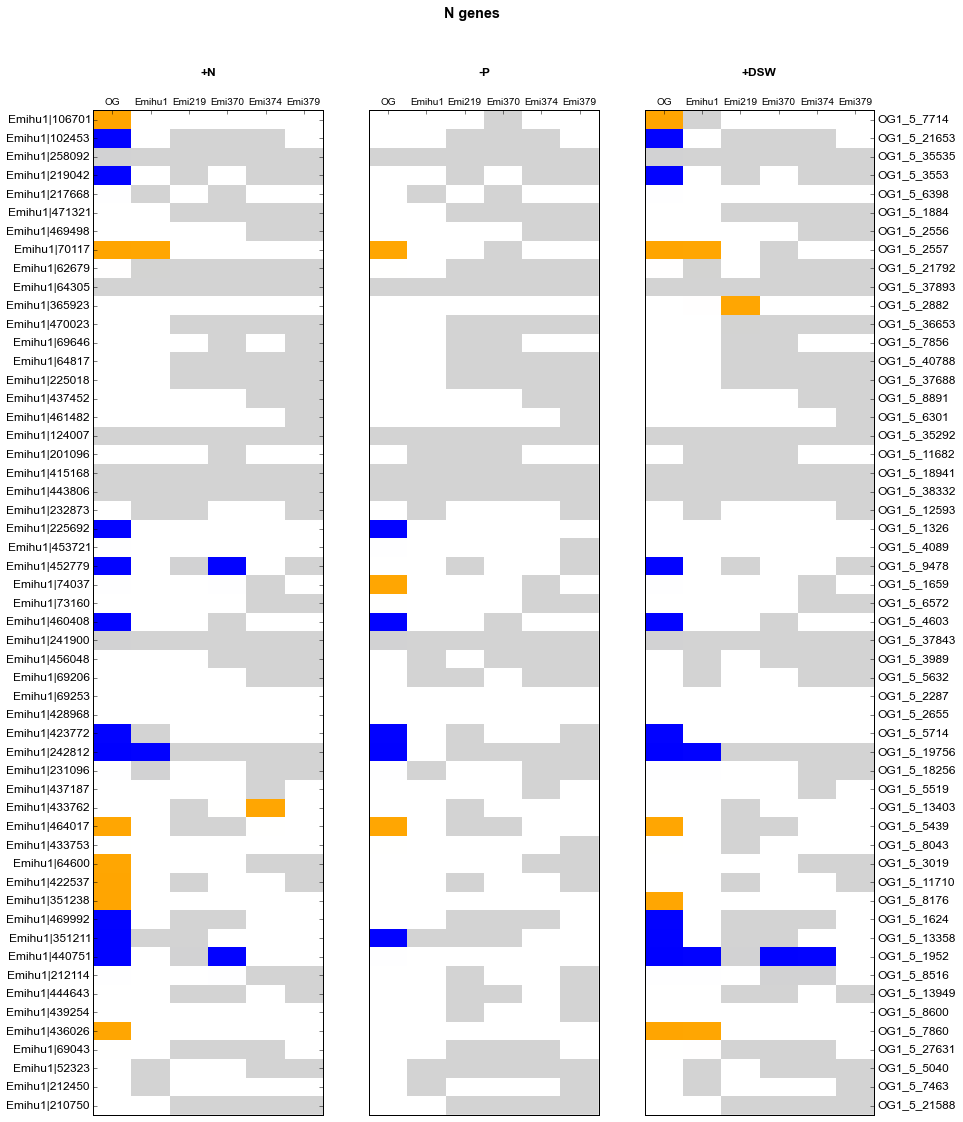

In [858]:
figN,ax=plt.subplots(1,3)
QvAll_N=PlotTriptic(Ngenes, figN, ax)
figN.suptitle('N genes', weight='bold', fontsize='x-large')


In [ ]:
QvAll_C

## N-related genes

### Up in +N, -P, or DSW : 
- similar to cystathionine beta lyase
- Putative formate/nitrite transporter 
- glutamine synthetase type III  
- Ammonium transporter (AMT4)
- One of four component proteins of the enzyme glycine decarboxylase. (GDCT1)
- Cytochrome b5
- Ammonium transporter (AMT2)
- Glu/Leu/Phe/Val dehydrogenase (Only in Emi374)
- Putative ammonium transporter (Only in -P) (AMT9)
- putative phosphoserine phosphatase serB

### Down in +N, -P, or DSW : 
- Putative urea transporter (DUR3)
- acetyl-CoA carboxylase hypothetical
- Acetamidase/Formamidase
- Urease (URE2)
- Nitrate transporter (NRT1)
- Putative ammonium transporter (AMT15)
- ferredoxin-dependent glutamate synthase
- Acetamidase/Formamidase : check out Brian's paper on growth on amides. 
- Amidases / Nitrogenase / indole acetamide hydrolase (?? 102453)

*Ammonia dynamics in the bottles: some sort of change ; nitrate added and recycled to amonia in six days; starting to respond to changes in the amonia concentrations. Urea transporter; urease; all turn off; reduction in requirement for alterntaive nitrogen sources N and NH4 most bioavailable.*

N switches are known to be related to ploidy changes. 

From Rokitta: 
The effects of N-limitation on the haploid metabolism shared common features with the diplont response, e.g., the down-regulation of the synthesis of key amino acids, purines and pyrimidines. The OUC was, like in the diploid stage, down-regulated in key reactions (carbamoylphosphate synthase GJ11368, GJ00711; ornithine transporter GJ27211; argininosuccinate synthase GJ01516) and also in peripheral reactions that divert intermediates towards proline or polyamine synthesis (ornithine aminotransferase GJ00647; ornithine decarboxylase GJ06908). These regulation patterns indicate that the haploid stage applies the same biochemical strategy of using OUC cycle intermediates and their derivatives as a cellular backup for N.

Clearly visible in the haploid stage was the down-regulation of the plastidary GS-GOGAT system, which conventionally assimilates inorganic N (glutamine-synthetase GJ00014, GJ09184, GJ12379; glutamate-synthase GJ12602), as well as the machinery for assimilation of oxidized inorganic nitrogen sources (NO2− transporter GJ07216; NO3− transporter GJ16902, GJ15318, GJ00825; NO2− reductase GJ21771, GJ00725; NO3− reductase GJ04471, GJ23958, GJ09099). The down-regulation of NO3− reductase under N-limitation has been observed earlier in diploid E. huxleyi cultures [29,52] and in N-limited diatoms [31], and has been attributed to a substrate-sensing regulatory system that enables transcription of NO3− related genes only in the presence of NO3−[53]. Unlike the diplont, the haploid stage did not induce an ATP-driven cytoplasmic glutamate amination to salvage NH4+ liberated from internal amino acid turnover. Likewise, no expression changes in the machinery for the uptake of dissolved (in)organic N was seen in the haplont. One explanation may be that salvaging of dissolved (in)organic nitrogenous compounds may be constitutively expressed in the haploid stage, so that no expression changes could be seen.

The obtained transcriptomic data well support the flux modes of N through protistan metabolism as they were previously hypothesized by [30] and [31]. Also in E. huxleyi, the OUC appears to be a distributional hub for N that balances carbon assimilation and breakdown with available cellular nitrogen budgets. This balancing may be achieved because N and C metabolism rely on and respond to common substrates [31,32,55]. The presence of OUC genes also in dinoflagellates [33] suggests that the described metabolic responses satisfy biochemical requirements which are generally imposed on eukaryotic cells in nutrient-scarce environments. Here we show the first evidence that E. huxleyi applies an MQO, an interesting genetic feature among eukaryotic phytoplankton, which seems to enable organisms to drive efficient ATP synthesis with reduced respiratory carbon loss. This enzyme might contribute to E. huxleyi’s ability to inhabit very divergent environments [7,8,56]. The profound regulation patterns we observed in response to N limitation are not recognizable in the response to sulfate deficiency as presented by Bochenek et al. [57]. Under sulfate deprivation, cell division was slowed down, but growth in terms of biomass production was still high, as can be derived from the strongly increased cell volumes. This may be the reason why under sulfate deficiency there was no indication of a comparable large-scale metabolic re-configurations as seen under N-limitation.

The haploid cells, which might function as a ‘seeding population’ in the aftermath of viral bloom termination [17], showed less transcriptomic responses globally, which paralleled the lower increase in particulate C:N ratio under N-limitation in haploid compared to diploid cells (Additional file 2: Figure S2). Haploid cells apparently did not specifically regulate genes for scavenging external N sources when confronted with N-limitation. This may either be due to a constitutive expression of N scavenging machinery or perhaps because the haplont does not rely on these genes at all, being more adapted for ‘post-bloom’ environments, in which waters may contain higher amounts of organic nutrients released from decaying phytoplankton. As both life-cycle stages appear to have mixotrophic capacities [19], in the hypothesized natural scenario, haplonts might generally be able to rely more on external dissolved or particulate sources of N. These diverging morphological and physiological properties support the notion that the stages are specialized to occupy distinct ecological niches.



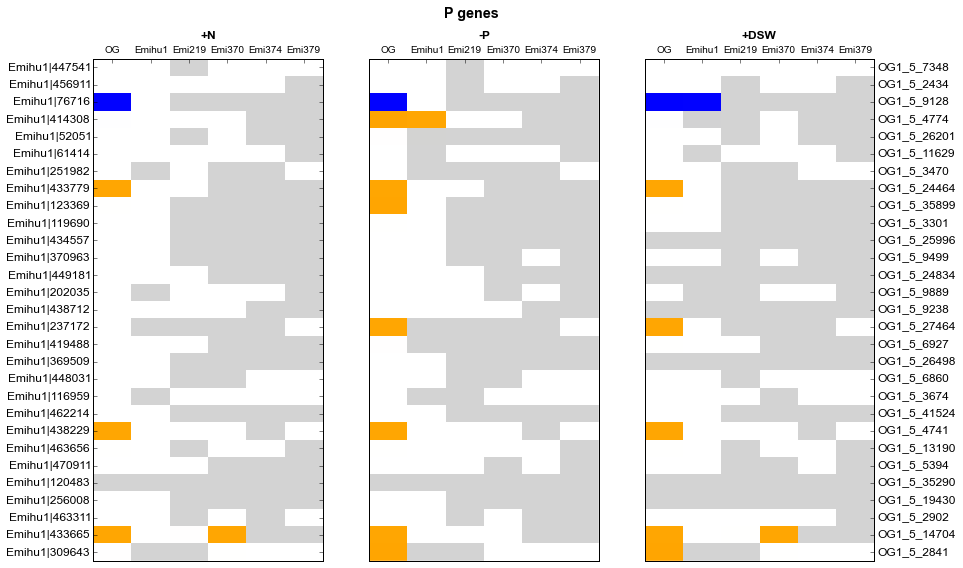

In [43]:
figP,ax=plt.subplots(1,3)
QvAll_P=PlotTriptic(Pgenes, figP, ax)
figP.suptitle('P genes', weight='bold', fontsize='x-large')

## P-related genes

### Up in +N, -P, or DSW : 
- Alkaline phosphatase 1 (only in -P)
- Glycerophosphoryl diester phosphodiesterase (all)
- phosphate repressible phosphate permease (only in -P)
- Putative 5'-nucleotidase (only in -P, DSW)
- SPX, N-terminal (all)
- Putative alternative oxidase
- Glycerophosphoryl diester phosphodiesterase (only -P)

###Down in +N, -P, or DSW:
- Plasma membrane H+-transporting ATPase	


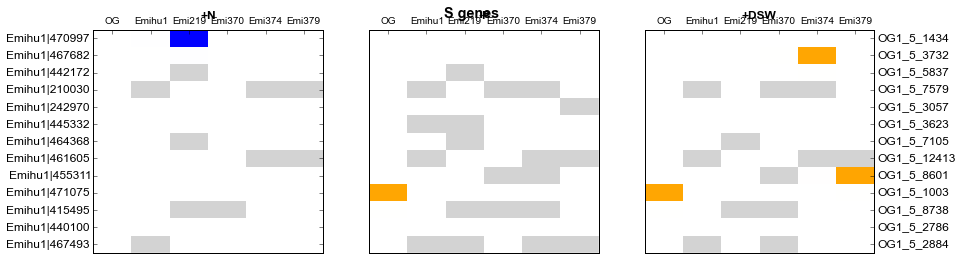

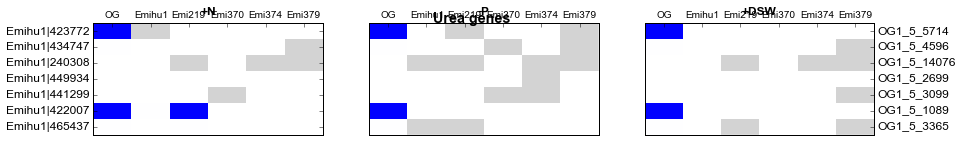

In [44]:
figS,ax=plt.subplots(1,3)
QvAll_S=PlotTriptic(Sgenes, figS, ax)
figS.suptitle('S genes', weight='bold', fontsize='x-large')

figU,ax=plt.subplots(1,3)
QvAll_U=PlotTriptic(Ureagenes, figU, ax)
figU.suptitle('Urea genes', weight='bold', fontsize='x-large')



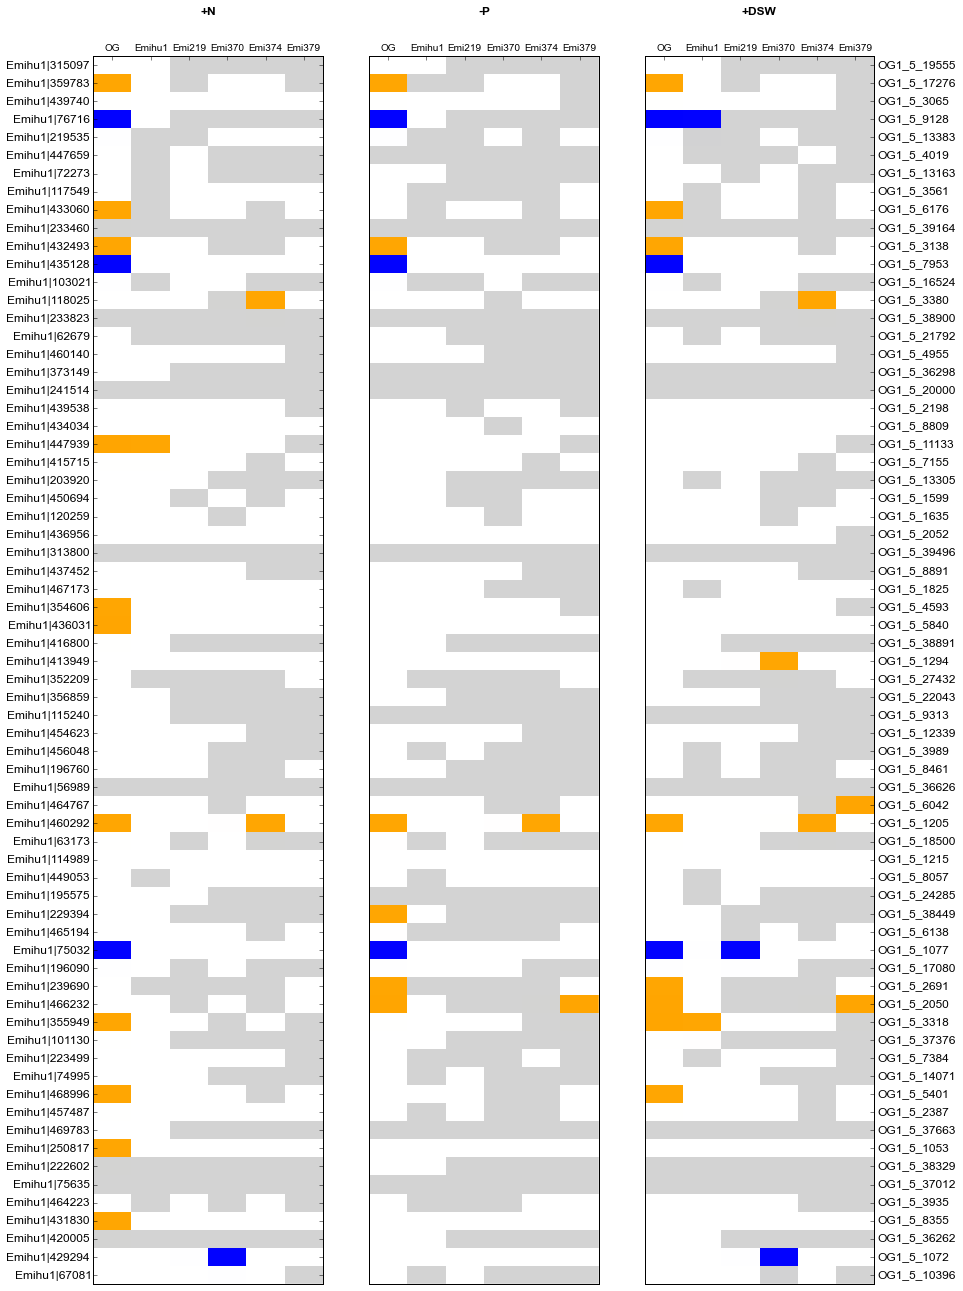

In [45]:
Calgenes=importGeneList("McKewGenesTargets/Calcification.tab")

figC,ax=plt.subplots(1,3)
QvAll_C=PlotTriptic(Calgenes, figC, ax)


In [46]:
print key
QvAll_C['QvX'].loc[gFHash_inv['Emihu1|463095']]


S_PlusP_vs_V_MinusP


OG                     0
Emihu1                 0
Emi219                 0
Emi370                -1
Emi374                 0
Emi379                 0
EmiName    Emihu1|429294
Name: OG1_5_1072, dtype: object

##Calcification-related genes

### Up in +N, -P, or DSW : 
- subunit of Vo sector of a vacuolar H+-ATPase
- V-ATPase, E
- carbonic anhydrase, gamma
- K+-dependent Na+/Ca2+ exchanger (NCKX2; NCKX family)
- Sodium/calcium exchanger protein
- carbonic anhydrase, delta
- Ca2+/Mg2+-permeable cation channels (LTRPC family)
- 	V-ATPase, G
- four domain voltage-gated Ca2+ channels	 
- Ca2+/Mg2+-permeable cation channels transient receptor potential
- GPA (glutamic acid, proline and alanine) unknown, calcium binding
- carbonic anhydrase, delta
- carbonic anhydrase, beta
- anion exchanger-like, SLC4 Na+ independent Cl−/HCO3− exchangers


### Down in +N, -P, or DSW:
- calcium pump (only in one species-- not at the OG level)
- H+ PPase
- V-ATPase, B
- calcium pump



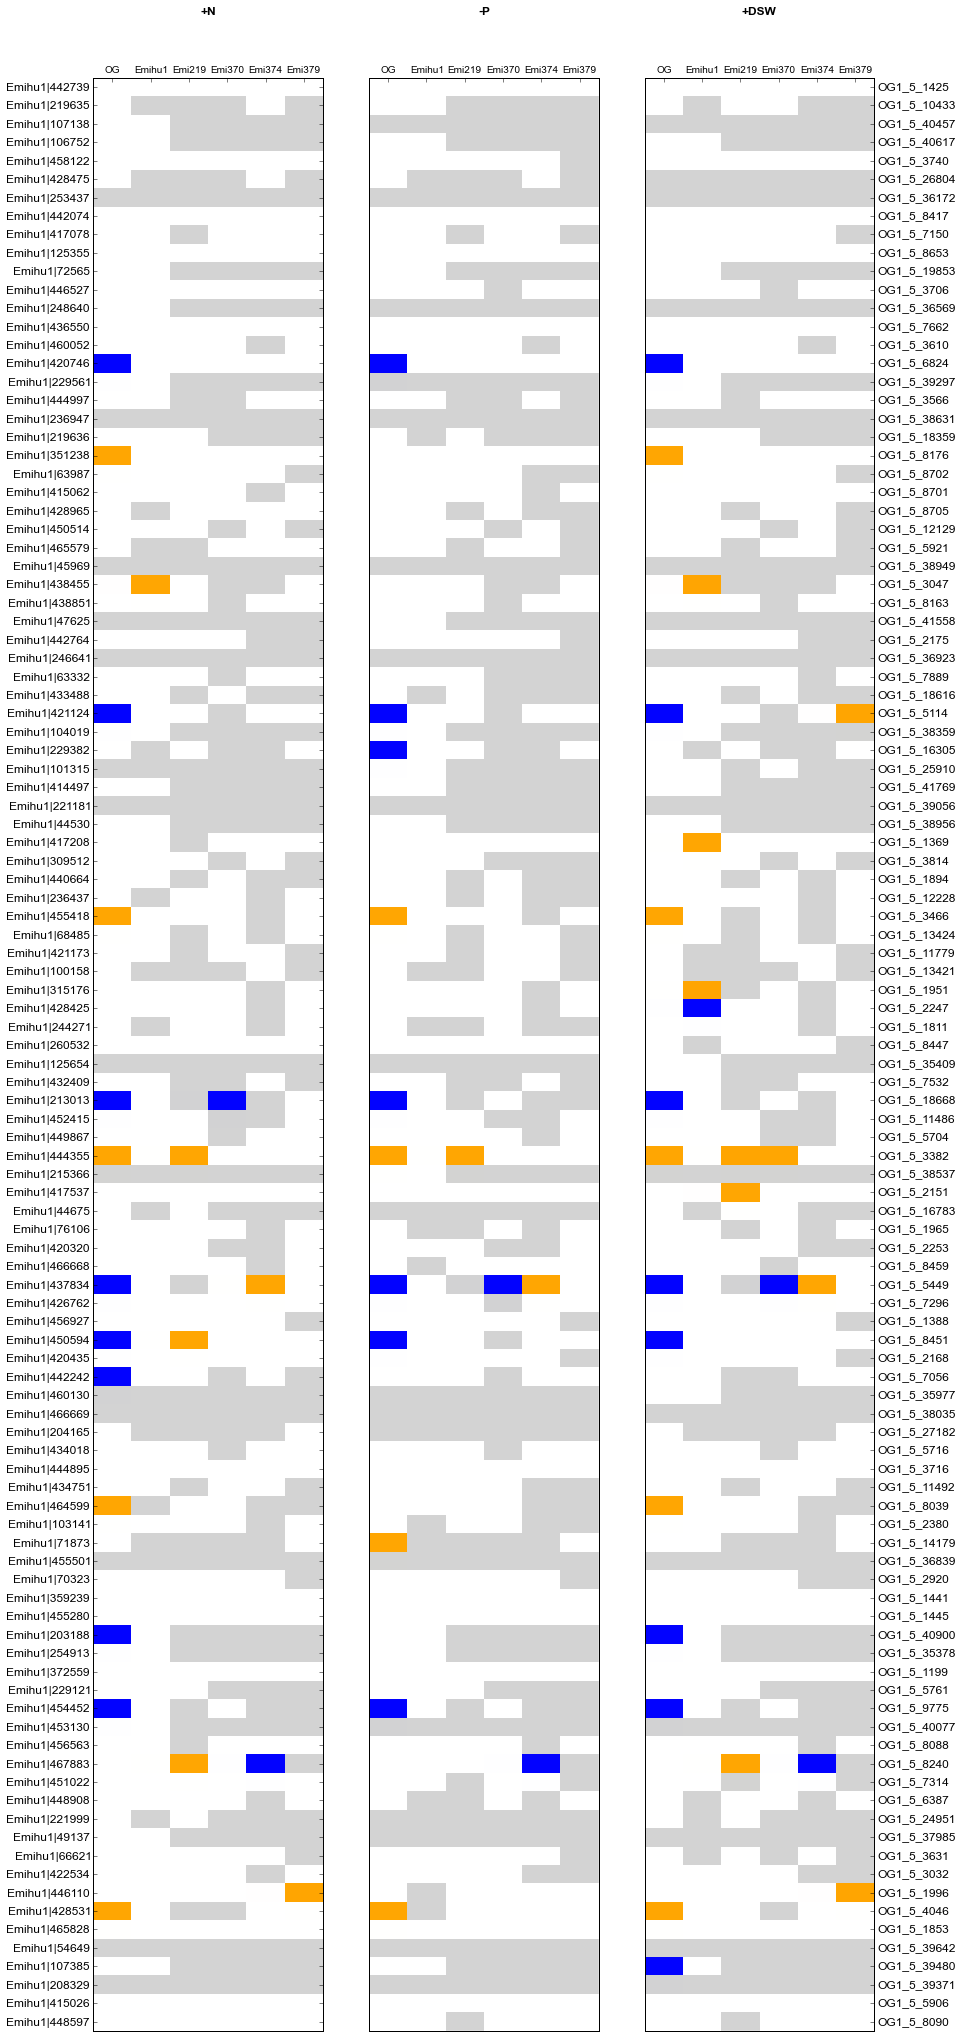

In [47]:
Cargenes=importGeneList("McKewGenesTargets/CarbonCycle.tab")

figCar,ax=plt.subplots(1,3)
QvAll_Car=PlotTriptic(Cargenes, figCar, ax)


## Carbon-related genes

### Up in +N, -P, or DSW : 
- similar to cystathionine beta lyase
- Putative formate/nitrite transporter 
- glutamine synthetase type III  
- Ammonium transporter (AMT4)
- One of four component proteins of the enzyme glycine decarboxylase. (GDCT1)
- Cytochrome b5
- Ammonium transporter (AMT2)
- Glu/Leu/Phe/Val dehydrogenase (Only in Emi374)
- Putative ammonium transporter (Only in -P) (AMT9)
- putative phosphoserine phosphatase serB

### Down in +N, -P, or DSW : 
- Enolase 
- Plastidic glyceraldehyde 3-phosphate dehydrogenase
- Isocitrate dehydrogenase (-P only)
- Enolase1
- Glyceraldehyde 3-phosphate dehydrogenase
- 	isocitrate dehydrogenase, NADP-dependent
- 	sedoheptulose-1,7-bisphosphatase (chloroplast?)
- Fructose-1,6-bisphosphate aldolase class II (EC:4.1.2.13), prokaryotic origi
- Enolase2
- 	Phosphoglycerate kinase rpobably plastid targeted 
- 	citrate synthase, mitochondrial (up in one organism... down in another???)467883


### From Rokitta N-lim transcriptome study
<img src="McKewGenesTargets/Rokitta_Carbon.jpg">


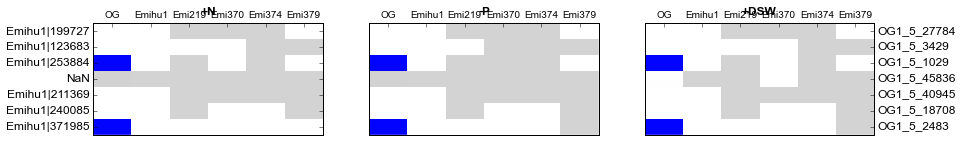

In [48]:
#Based on Frada et al. 
Hapgenes=importGeneList("McKewGenesTargets/HaploidSpecific.tab")
Hapgenes.add('Emi370|CAMPEP_0187660036')
Hapgenes.add('Emi379|CAMPEP_0187613134')
figHap,ax=plt.subplots(1,3)
QvAll_Hap=PlotTriptic(Hapgenes, figHap, ax)


"it seems probable that nitrogen starvation induced syngamy, resulting in (diploid) C-cells in their cultures."

"Especially the diploid stage induces machinery to scavenge external (in)organic nitrogenous compounds (blue shade)."

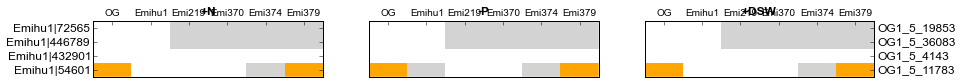

In [49]:
Virgenes=importGeneList("McKewGenesTargets/ViralTargets.tab")
for i in open("McKewGenesTargets/ViralTargets_Other.tab", 'r'):
    Virgenes.add(i)
figVir,ax=plt.subplots(1,3)
QvAll_Vir=PlotTriptic(Virgenes, figVir, ax)


In [50]:
# from Bio import SeqIO
# seq=[]
# fastafile = open("../pplacer/GPA/AllGPAHits.fa")
# for handle in SeqIO.parse(fastafile, 'fasta'):
#     if (len(handle.seq) > 400) & (len(handle.seq) < 10000):
#         print handle.id, len(handle.seq)
#         seq.append(handle)
# SeqIO.write(seq, "../pplacer/GPA/BestGPAHits.fa", 'fasta')

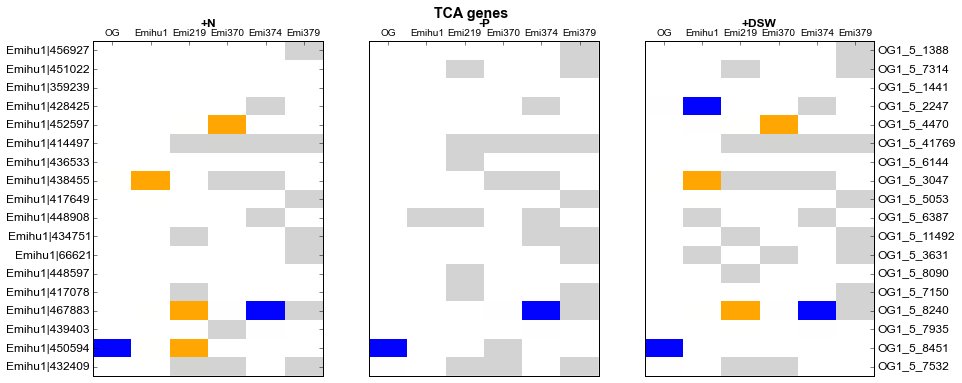

In [2057]:
figP,ax=plt.subplots(1,3)
QvAll_P=PlotTriptic(TCAGenes, figP, ax)
figP.suptitle('TCA genes', weight='bold', fontsize='x-large')

In [2194]:
##Import the RSEM Files for gene families
files=glob.glob("edgeR.18185.dir/*DE_results")
RSEM_Gene_Hash={}
for f in files:
    name=f.split('.')[5]
    out=pd.read_table(f)
    RSEM_Gene_Hash[name]=out

def TransList(inset):
    outset=[]
    for i in inset:
        if i in gFHash_inv.keys():
            g=gFHash_inv[i]
            outset.append(g)
    return outset
VitaminGenes.update(['OG1_5_24900'])
N_og=TransList(Ngenes)
P_og=TransList(Pgenes)
V_og=TransList(VitaminGenes)
S_og=TransList(Sgenes)
Cal_og=TransList(Calgenes)
Car_og=TransList(Cargenes)
Vir_og=TransList(Virgenes)
Hap_og=TransList(Hapgenes)
Nucl_og=TransList(Nucleotide)
Amino_og=TransList(AminoAcid)
ATP_og=TransList(ATPGenes)
Calvin_og=TransList(CalvinGenes)
LHC_og=TransList(LHCGenes)
TCA_og=TransList(TCAGenes)
Glyc_og=TransList(GlycGenes)
Lipid_og=TransList(LipidGenes)
GeneList=[N_og, P_og, Cal_og, Car_og, Hap_og, Amino_og, Nucl_og, ATP_og, Calvin_og, LHC_og, TCA_og, Glyc_og, Lipid_og]

GeneNames=['Nitrogen', 'Phosphorus', 'Calcification', 'Carbon', 'Haploid', 
           'Amino', 'Nucleotide', 'ATP', 'Calvin Cycle', 'Photosynthesis', 'TCA Cycle', 'Glycolysis', 'Lipid']

for con in RSEM_Gene_Hash:
    df=RSEM_Gene_Hash[con]
    df['GType']='None'
    for OGList, Name in zip(GeneList, GeneNames):
        Match=set(df.index).intersection(set(OGList))
        df.loc[Match,'GType']=Name
    RSEM_Gene_Hash[con]=df
    
for con in RSEM_Isoform_Hash:
    df=RSEM_Isoform_Hash[con]
    df['GType']='None'
    for OGList, Name in zip(GeneList, GeneNames):
        GenesFromOG=[gFHash[og] for og in OGList]
        GenesFromOG=[item for sublist in GenesFromOG for item in sublist]
        Match=set(df.index).intersection(set(GenesFromOG))
        df.loc[Match,'GType']=Name
    RSEM_Isoform_Hash[con]=df

In [2196]:
print LHC_og
# RSEM_Gene_Hash['Q_con_vs_R_PlusN'][RSEM_Gene_Hash['Q_con_vs_R_PlusN'].GType=='Lipid']

['OG1_5_13045', 'OG1_5_6687', 'OG1_5_36426', 'OG1_5_19790', 'OG1_5_37658', 'OG1_5_39629', 'OG1_5_2388', 'OG1_5_7122', 'OG1_5_19790', 'OG1_5_17184', 'OG1_5_8309', 'OG1_5_7774', 'OG1_5_19103', 'OG1_5_36527', 'OG1_5_11181', 'OG1_5_6616', 'OG1_5_2130', 'OG1_5_8156', 'OG1_5_8700', 'OG1_5_14133', 'OG1_5_8508', 'OG1_5_1552', 'OG1_5_20204', 'OG1_5_12904', 'OG1_5_5757', 'OG1_5_6812', 'OG1_5_1714', 'OG1_5_5811', 'OG1_5_13388', 'OG1_5_4202', 'OG1_5_18970', 'OG1_5_10443', 'OG1_5_7313', 'OG1_5_7480', 'OG1_5_39468', 'OG1_5_1748', 'OG1_5_3333', 'OG1_5_4412', 'OG1_5_2183', 'OG1_5_2831', 'OG1_5_11242', 'OG1_5_3393', 'OG1_5_3325', 'OG1_5_37175', 'OG1_5_4113', 'OG1_5_34965', 'OG1_5_6820', 'OG1_5_19188', 'OG1_5_3856', 'OG1_5_7394', 'OG1_5_8331', 'OG1_5_5650', 'OG1_5_1748', 'OG1_5_8676', 'OG1_5_8717', 'OG1_5_5861', 'OG1_5_7963', 'OG1_5_3922', 'OG1_5_7742', 'OG1_5_7283', 'OG1_5_7536']


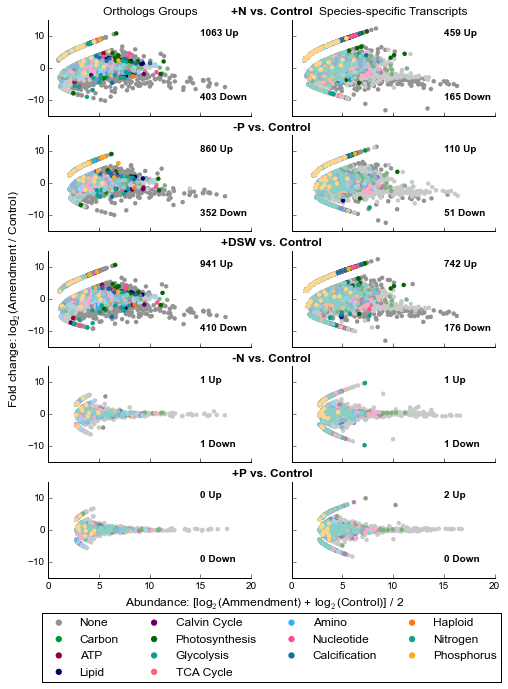

In [2184]:
# geneColors={'None':pal.colorbrewer.sequential.Greys_3_r.get_mpl_colormap(),
#             'Carbon':pal.colorbrewer.sequential.Greens_3_r.get_mpl_colormap(), 
#             'Phosphorus':pal.colorbrewer.sequential.Oranges_3_r.get_mpl_colormap(), 
#             'Nitrogen':pal.colorbrewer.sequential.Purples_3_r.get_mpl_colormap(),
#             'Calcification':pal.colorbrewer.sequential.Blues_3_r.get_mpl_colormap(),
#             'Haploid':pal.colorbrewer.sequential.Greens_3_r.get_mpl_colormap(),
#             'Vitamin': pal.colorbrewer.sequential.BuGn_5_r.get_mpl_colormap(),
#            'Nucleotide':pal.colorbrewer.sequential.BuPu_5_r.get_mpl_colormap(), 
#                       'Amino':pal.colorbrewer.sequential.BuPu_5_r.get_mpl_colormap()}
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % tuple(rgb)


geneColors={'None': '#939393', 
            'Carbon':'#009933',
            'Nucleotide':'#ff4d94', 
               'Amino': '#33adff',
            'Phosphorus':'#FFAC16', 
            'Nitrogen':'#0EA28D',
            'Calcification':'#176DA4',
            'Haploid':'#FF7716',
              'ATP':'#990033', 
           'Calvin Cycle': '#660066', 
           'Photosynthesis': '#006600',
           'TCA Cycle':'#FF616F', 
           'Glycolysis': '#08A08C',
           'Lipid': '#000066'}

# GeneList=[N_og, P_og, Cal_og, Car_og, Hap_og, Nucl_og, Amino_og, ATP_og, Calvin_og, LHC_og, TCA_og, Glyc_og]
GeneNames=['None','Carbon', 'ATP','Lipid','Calvin Cycle', 'Photosynthesis', 'Glycolysis', 'TCA Cycle', 
           'Amino','Nucleotide',  'Calcification',  'Haploid','Nitrogen', 'Phosphorus']
OrderedList=['Q_con_vs_R_PlusN', 'Q_con_vs_V_MinusP', 'Q_con_vs_X_PlusDSW', 'Q_con_vs_T_MinusN', 'Q_con_vs_S_PlusP']
fig,axs= subplots(5,2)
fig.set_size_inches(8,10)
c=0
conditions=[]
for key,ax in zip(OrderedList, axs):
    c+=1
    df=RSEM_Gene_Hash[key]
    dfi=RSEM_Isoform_Hash[key]
#     ax.set_title(key)
    ax1=ax[0]
    ax2=ax[1]
    condition=[]
    for Name in GeneNames:    
        #create colormap by mixing white and the color in the dictionary
        white=hex_to_rgb('#FFFFFF')
        color=hex_to_rgb(geneColors[Name])
        lightColor=np.add(white,color)/2
        lightColor=rgb_to_hex(lightColor)
        color=rgb_to_hex(color)
        cmap=mpl.colors.LinearSegmentedColormap.from_list('custom', [color, lightColor])
        cmaplist = [cmap(i) for i in range(cmap.N)]
        bounds = (0,0.05,1)
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        df[df.GType==Name].plot(kind="scatter", x='logCPM', y='logFC',c='FDR', s=20
                                ,cmap=cmap,norm=norm,lw=0,ax=ax1, grid=False, 
                                colorbar=False, xlim=[0,20], ylim=[-15,15],yticks=[-10,0,10])
        g=dfi[dfi.GType==Name].plot(kind="scatter", x='logCPM', y='logFC',c='FDR', s=20
                        ,cmap=cmap,norm=norm,lw=0,ax=ax2, grid=False, 
                        colorbar=False, xlim=[0,20], ylim=[-15,15],yticks=[-10,0,10])
        ax2.set_yticklabels([])

        condition.append(g)
    ax2.text(15,10, str(len(dfi[(dfi.FDR<0.05) & (dfi.logFC > 0)]))+ ' Up', ha='left', fontweight='bold')
    ax2.text(15,-10, str(len(dfi[(dfi.FDR<0.05) & (dfi.logFC < 0)]))+ ' Down', ha='left', fontweight='bold')
    ax1.text(15,10, str(len(df[(df.FDR<0.05) & (df.logFC > 0)]))+ ' Up', ha='left', fontweight='bold')
    ax1.text(15,-10, str(len(df[(df.FDR<0.05) & (df.logFC < 0)]))+ ' Down', ha='left', fontweight='bold')

    for a in ax:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.get_xaxis().tick_bottom()
        a.get_yaxis().tick_left()
        a.set_xlabel('')
        
    if c==3: 
        ax1.set_ylabel('Fold change: log$_2$(Amendment / Control)', fontsize='large')
        ax2.set_ylabel('')
    else:
        ax1.set_ylabel('')
        ax2.set_ylabel('')
for x,tit in enumerate(['+N vs. Control', '-P vs. Control', '+DSW vs. Control', '-N vs. Control', '+P vs. Control']):    
    ax=fig.add_subplot(5,1,x+1)
    ax.axis('off')
    ax.set_title(tit, fontsize='large', weight='bold')
lsc=[]
for c in GeneNames:
    scatterLeg=axs[0][1].scatter([100],[100], c=geneColors[c], lw=0, s=40)  
    lsc.append(scatterLeg)
ax.legend(lsc, GeneNames, scatterpoints=1, loc=9, ncol=4, bbox_to_anchor=(.5, -.3))
axs[0][0].set_title('Orthologs Groups')
axs[0][1].set_title('Species-specific Transcripts')
fig.suptitle('Abundance: [log$_2$(Ammendment) + log$_2$(Control)] / 2', fontsize='large', position=[.5,0.1])
fig.savefig('../Figures/MANTA_Gene_Isoform.pdf')
fig.savefig('../Figures/MANTA_Gene_Isoform.png')


In [2185]:
def makeCMAP(CMAP, size, bounds):
    N=size
    palCMAP=CMAP.get_mpl_colormap()
    cmaplist = [palCMAP(i) for i in range(palCMAP.N)]
    norm = mpl.colors.BoundaryNorm(bounds, palCMAP.N)
    return (palCMAP, norm)


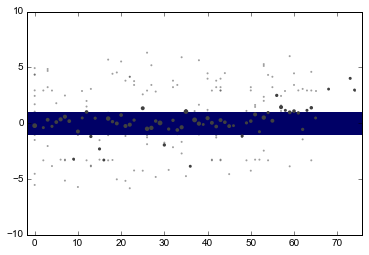

In [2189]:
def Scatter_IsoG(OGRSEM_In, ISORSEM_In, experiment, GType,experiment_sort,ax=ax):
    #input 
    df=OGRSEM_In[experiment]
    df2=OGRSEM_In[experiment_sort]

    tf=ISORSEM_In[experiment]
    #Colormap for the scatter plot OGs
    cmap, norm = makeCMAP(pal.colorbrewer.diverging.RdGy_5, size=2, bounds=(0,0.05,1))
    #Colormap for the transcripts
    cmap2, norm2 = makeCMAP(pal.colorbrewer.diverging.RdGy_5, size=2, bounds=(0,0.05,1))

    geneColors={'None': '#939393', 
            'Carbon':'#009933',
            'Nucleotide':'#ff4d94', 
               'Amino': '#33adff',
            'Phosphorus':'#FFAC16', 
            'Nitrogen':'#0EA28D',
            'Calcification':'#176DA4',
            'Haploid':'#FF7716',
              'ATP':'#990033', 
           'Calvin Cycle': '#660066', 
           'Photosynthesis': '#006600',
           'TCA Cycle':'#FF616F', 
           'Glycolysis': '#08A08C',
           'Lipid': '#000066'}

    ogList=df2[df2.GType==GType].sort('logFC').index
#     fig,ax=plt.subplots(1)
#     fig.set_size_inches(len(ogList)/6,5)

    ax.scatter( x=range(len(ogList)), y=df.loc[ogList,'logFC'], 
               lw=0, marker='o',zorder=1000, c=df.loc[ogList,'FDR'],
              cmap=cmap, norm=norm, s=df.loc[ogList, 'logCPM']*3)

#     ax.axhline(y=0, c=geneColors[GType](0), lw=12,zorder=0)
    ax.axhspan(-1,1,color=geneColors[GType])
#     ax.axhline(y=1, c='k', ls='--', alpha=.7,zorder=0)
#     ax.axhline(y=-1, c='k', ls='--', alpha=.7,zorder=0)
#     ax.axhline(y=5, c='k', ls='--', alpha=.7,zorder=0)
#     ax.axhline(y=-5, c='k', ls='--', alpha=.7,zorder=0)
#     ax.axhline(y=-10, c='k', ls='--', alpha=.7,zorder=0)
    
    for i,x in enumerate(ogList):
        trans=gFHash[x]
        trs=tf.loc[set(trans).intersection(tf.index)]
        ax.scatter(x=[i]*len(trs), y=trs.logFC, lw=0, marker='o',
                   c=trs.FDR,cmap=cmap2, norm=norm2, alpha=.5,s=4)

    ax.set_ylim([-10,10])   
    ax.margins(.02,.02)
#     fig.savefig('ScatterOG.'+experiment+'.'+GType+'.pdf')
#     ax.set_title(experiment)
    return ax, ogList, len(ogList)
fig,ax=plt.subplots(1)

# Pax, Pout,Plen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key ,'Phosphorus','Q_con_vs_V_MinusP',ax)
# Nax, Nout,Nlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Nitrogen','Q_con_vs_R_PlusN',ax)
# Cax, Cout,Clen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key , 'Calcification','Q_con_vs_R_PlusN',ax)
# Hax, Hout,Hlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key , 'Haploid','Q_con_vs_R_PlusN',ax)
Hax, Hout,Hlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key , 'Lipid','Q_con_vs_R_PlusN',ax)


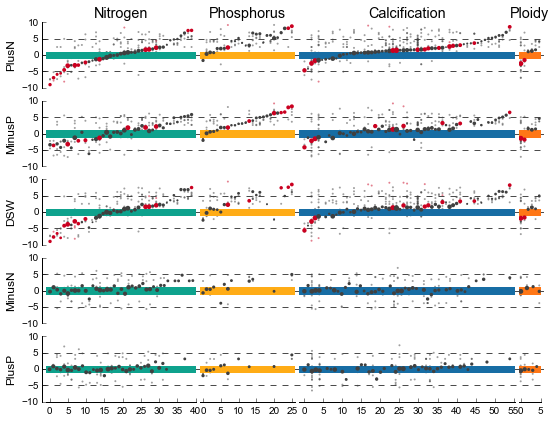

In [985]:
from matplotlib import gridspec
i=1
fig=plt.figure(1)
TotalWidth=Plen+Nlen+Clen+Hlen

fig.set_size_inches(9,6.8)
gs = gridspec.GridSpec(5,TotalWidth+i*5)


for key in RSEM_Gene_Hash.keys():
    for pp,exKey in enumerate(['PlusN', 'MinusP', 'DSW','MinusN','PlusP']):
        if 'Q' in key and exKey in key:
            ax5=fig.add_subplot(gs[pp, :])
            ax1=fig.add_subplot(gs[pp, i:Nlen+i])
            ax2=fig.add_subplot(gs[pp, Nlen+2*i:Nlen+Plen+2*i])
            ax3=fig.add_subplot(gs[pp, Nlen+Plen+3*i:Nlen+Plen+Clen+3*i])
            ax4=fig.add_subplot(gs[pp, Nlen+Plen+Clen+4*i:Nlen+Plen+Clen+4*i+Hlen])

            Pax, Pout,Plen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key ,'Phosphorus','Q_con_vs_V_MinusP',ax2)
            Nax, Nout,Nlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Nitrogen','Q_con_vs_R_PlusN',ax1)
            Cax, Cout,Clen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key , 'Calcification','Q_con_vs_R_PlusN',ax3)
            Hax, Hout,Hlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key , 'Haploid','Q_con_vs_R_PlusN',ax4)
            if pp == 0:

                ax1.set_title('Nitrogen', fontsize='x-large')
                ax2.set_title('Phosphorus', fontsize='x-large')
                ax3.set_title('Calcification', fontsize='x-large')
                ax4.set_title('Ploidy', fontsize='x-large')

            
            if exKey != 'PlusP':            
                for ax in [ax1,ax2,ax3,ax4]:
                    ax.axis('off')
            else:
                for ax,lent in zip([ax1,ax2,ax3,ax4],[Nlen,Plen,Clen,Hlen]):
                    ax.set_xticks(np.arange(0,lent,5))
                    ax.spines['top'].set_visible(False)
                    ax.spines['left'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.get_yaxis().set_visible(False)
                    ax.get_xaxis().tick_bottom()
                    ax.patch.set_visible(False)
            
            ax5.set_ylabel(exKey, fontsize='large')
            ax5.axhline(y=0, c='k', ls='-', alpha=.7,zorder=0)
            ax5.axhline(y=5, c='k', ls='--', alpha=.7,zorder=0)
            ax5.axhline(y=-5, c='k', ls='--', alpha=.7,zorder=0)
            ax5.set_yticks([-10,-5,0,5,10])
            ax5.set_ylim([-10,10])
            ax5.spines['top'].set_visible(False)
            ax5.spines['right'].set_visible(False)
            ax5.spines['bottom'].set_visible(False)
            ax5.get_yaxis().tick_left()
            ax5.get_xaxis().set_ticks([])

#             if exKey == 'MinusP':            
#                 ax.set_xticklabels(np.arange(0,lent,5))
#                 for exType, ax in zip([Nout, Pout, Cout, Hout],[ax1,ax2,ax3,ax4]):
#                     for ii,og in enumerate(exType):
#                         eList=gFHash[og]
#                         reList=filter(lambda x: x.startswith('Emihu1'), eList)
#                         eLab=reList[0]
#                         ax.text(ii,-10,eLab, rotation='vertical',va='center', ha='center')
            
            

In [995]:
NG=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
DSWG=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']
PG=RSEM_Gene_Hash['Q_con_vs_V_MinusP']
NI=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
DSWI=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']
PI=RSEM_Gene_Hash['Q_con_vs_V_MinusP']

GS=[NG,PG,DSWG]
OG_Nut_out=open('Nutrient_Gene_FC_Table.txt', 'w')
OG_Nut_out.write('\t'.join(['Nutrient ID','Orthologus Group', 
                            'Transcripts', 'Up in +N', 'Up in -P', 'Up in DSW']))
OG_Nut_out.write('\n')
for treatment,l in zip([Nout,Pout,Cout,Hout],['N','P','C','H']):
    for i, og in enumerate(treatment):
        ogSig=[]
        EmiT=gFHash[og]
        EmiTout='; '.join(EmiT)
        for R in GS:
            if og in R.index:
                if R.loc[og,'FDR']<0.05:
                    ogSig.append('1')
                else:
                    ogSig.append('0')
            else:
                ogSig.append('0')
        ID=l+str(i)
        OG_Nut_out.write('\t'.join([ID, og, EmiTout, ogSig[0],ogSig[1],ogSig[2]]))
        OG_Nut_out.write('\n')
OG_Nut_out.close()

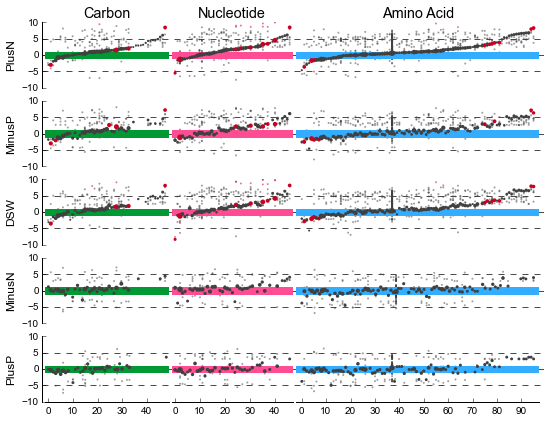

In [2035]:
from matplotlib import gridspec
i=1
fig=plt.figure(1)
TotalWidth=Carlen+Nulen+Amlen

fig.set_size_inches(9,6.8)
gs = gridspec.GridSpec(5,TotalWidth+i*5)


for key in RSEM_Gene_Hash.keys():
    for pp,exKey in enumerate(['PlusN', 'MinusP', 'DSW','MinusN','PlusP']):
        if 'Q' in key and exKey in key:
            ax5=fig.add_subplot(gs[pp, :])
            ax1=fig.add_subplot(gs[pp, i:Carlen+i])
            ax2=fig.add_subplot(gs[pp, Carlen+2*i:Carlen+Nulen+2*i])
            ax3=fig.add_subplot(gs[pp, Carlen+Nulen+3*i:Carlen+Nulen+Amlen+3*i])
#             ax4=fig.add_subplot(gs[pp, Carlen+Nulen+Amlen+4*i:Carlen+Nulen+Amlen+4*i+Hlen])

            Carax, Carout,Carlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key ,'Carbon','Q_con_vs_R_PlusN',ax1)
            Nuax, Nuout,Nulen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Nucleotide','Q_con_vs_R_PlusN',ax2)
            Amax, Amout,Amlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Amino','Q_con_vs_R_PlusN',ax3)

            if pp == 0:

                ax1.set_title('Carbon', fontsize='x-large')
                ax2.set_title('Nucleotide', fontsize='x-large')
                ax3.set_title('Amino Acid', fontsize='x-large')

            
            if exKey != 'PlusP':            
                for ax in [ax1,ax2,ax3,ax4]:
                    ax.axis('off')
            else:
                for ax,lent in zip([ax1,ax2,ax3],[Carlen, Nulen, Amlen]):
                    ax.set_xticks(np.arange(0,lent,10))
                    ax.spines['top'].set_visible(False)
                    ax.spines['left'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.get_yaxis().set_visible(False)
                    ax.get_xaxis().tick_bottom()
                    ax.patch.set_visible(False)
            
            ax5.set_ylabel(exKey, fontsize='large')
            ax5.axhline(y=0, c='k', ls='-', alpha=.7,zorder=0)
            ax5.axhline(y=5, c='k', ls='--', alpha=.7,zorder=0)
            ax5.axhline(y=-5, c='k', ls='--', alpha=.7,zorder=0)
            ax5.set_yticks([-10,-5,0,5,10])
            ax5.set_ylim([-10,10])
            ax5.spines['top'].set_visible(False)
            ax5.spines['right'].set_visible(False)
            ax5.spines['bottom'].set_visible(False)
            ax5.get_yaxis().tick_left()
            ax5.get_xaxis().set_ticks([])

#             if exKey == 'MinusP':            
#                 ax.set_xticklabels(np.arange(0,lent,5))
#                 for exType, ax in zip([Nout, Pout, Cout, Hout],[ax1,ax2,ax3,ax4]):
#                     for ii,og in enumerate(exType):
#                         eList=gFHash[og]
#                         reList=filter(lambda x: x.startswith('Emihu1'), eList)
#                         eLab=reList[0]
#                         ax.text(ii,-10,eLab, rotation='vertical',va='center', ha='center')
            
fig.savefig('MckewCarbonNucleotideAminoAcid.pdf')

In [2026]:
NG=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
DSWG=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']
PG=RSEM_Gene_Hash['Q_con_vs_V_MinusP']
NI=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
DSWI=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']
PI=RSEM_Gene_Hash['Q_con_vs_V_MinusP']

GS=[NG,PG,DSWG]
OG_Nut_out=open('Nutrient_Gene_FC_Table_Carbon_Supplemental.txt', 'w')
OG_Nut_out.write('\t'.join(['Nutrient ID','Orthologus Group', 
                            'Transcripts', 'Up in +N', 'Up in -P', 'Up in DSW']))
OG_Nut_out.write('\n')
for treatment,l in zip([Carout, Amout, Nuout],['Car','Am','Nu']):
    for i, og in enumerate(treatment):
        ogSig=[]
        EmiT=gFHash[og]
        EmiTout='; '.join(EmiT)
        for R in GS:
            if og in R.index:
                if R.loc[og,'FDR']<0.05:
                    ogSig.append('1')
                else:
                    ogSig.append('0')
            else:
                ogSig.append('0')
        ID=l+str(i)
        OG_Nut_out.write('\t'.join([ID, og, EmiTout, ogSig[0],ogSig[1],ogSig[2]]))
        OG_Nut_out.write('\n')
OG_Nut_out.close()

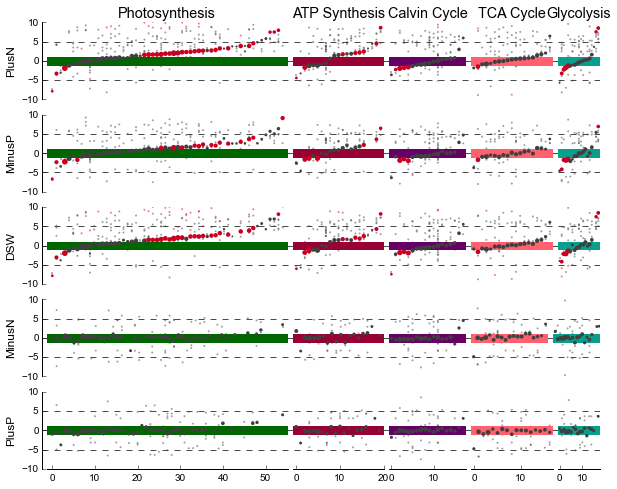

In [2197]:

# Phlen=10
# ATlen=10
# CClen=10
# TClen=10
# Glen=10
i=1
fig=plt.figure(1)
TotalWidth=Phlen+ATlen+CClen+TCLen+Glen

fig.set_size_inches(10,8)
gs = gridspec.GridSpec(5,TotalWidth+i*5)
for key in RSEM_Gene_Hash.keys():
    for pp,exKey in enumerate(['PlusN', 'MinusP', 'DSW','MinusN','PlusP']):
        if 'Q' in key and exKey in key:
            ax5=fig.add_subplot(gs[pp, :])
            ax1=fig.add_subplot(gs[pp, i:Phlen+i])
            ax2=fig.add_subplot(gs[pp, Phlen+2*i:Phlen+ATlen+2*i])
            ax3=fig.add_subplot(gs[pp, Phlen+ATlen+3*i:Phlen+ATlen+CClen+3*i])
            ax4=fig.add_subplot(gs[pp, Phlen+ATlen+CClen+4*i:Phlen+ATlen+CClen+4*i+TClen])
            ax7=fig.add_subplot(gs[pp, Phlen+ATlen+CClen+TClen+5*i:Phlen+ATlen+CClen+5*i+TClen+Glen])

            Phax, Phout,Phlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key ,'Photosynthesis','Q_con_vs_R_PlusN',ax1)
            ATuax, ATuout,ATlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'ATP','Q_con_vs_R_PlusN',ax2)
            CCmax, CCmout,CClen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Calvin Cycle','Q_con_vs_R_PlusN',ax3)
            TCmax, TCmout,TClen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'TCA Cycle','Q_con_vs_R_PlusN',ax4)
            Gmax, Gmout,Glen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Glycolysis','Q_con_vs_R_PlusN',ax7)

            if pp == 0:

                ax1.set_title('Photosynthesis', fontsize='x-large')
                ax2.set_title('ATP Synthesis', fontsize='x-large')
                ax3.set_title('Calvin Cycle', fontsize='x-large')
                ax4.set_title('TCA Cycle', fontsize='x-large')
                ax7.set_title('Glycolysis', fontsize='x-large')

            
            if exKey != 'PlusP':            
                for ax in [ax1,ax2,ax3,ax4,ax7]:
                    ax.axis('off')
            else:
                for ax,lent in zip([ax1,ax2,ax3, ax4, ax7],[Phlen, ATlen, CClen, TClen, Glen]):
                    ax.set_xticks(np.arange(0,lent,10))
                    ax.spines['top'].set_visible(False)
                    ax.spines['left'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.get_yaxis().set_visible(False)
                    ax.get_xaxis().tick_bottom()
                    ax.patch.set_visible(False)
            
            ax5.set_ylabel(exKey, fontsize='large')
            ax5.axhline(y=0, c='k', ls='-', alpha=.7,zorder=0)
            ax5.axhline(y=5, c='k', ls='--', alpha=.7,zorder=0)
            ax5.axhline(y=-5, c='k', ls='--', alpha=.7,zorder=0)
            ax5.set_yticks([-10,-5,0,5,10])
            ax5.set_ylim([-10,10])
            ax5.spines['top'].set_visible(False)
            ax5.spines['right'].set_visible(False)
            ax5.spines['bottom'].set_visible(False)
            ax5.get_yaxis().tick_left()
            ax5.get_xaxis().set_ticks([])

#             if exKey == 'MinusP':            
#                 ax.set_xticklabels(np.arange(0,lent,5))
#                 for exType, ax in zip([Nout, Pout, Cout, Hout],[ax1,ax2,ax3,ax4]):
#                     for ii,og in enumerate(exType):
#                         eList=gFHash[og]
#                         reList=filter(lambda x: x.startswith('Emihu1'), eList)
#                         eLab=reList[0]
#                         ax.text(ii,-10,eLab, rotation='vertical',va='center', ha='center')
            
fig.savefig('MckewATP_Carbon.pdf')

In [2050]:
NG=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
DSWG=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']
PG=RSEM_Gene_Hash['Q_con_vs_V_MinusP']
NI=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
DSWI=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']
PI=RSEM_Gene_Hash['Q_con_vs_V_MinusP']

GS=[NG,PG,DSWG]
OG_Nut_out=open('Nutrient_Gene_FC_Table_ATP_Supplemental.txt', 'w')
OG_Nut_out.write('\t'.join(['Nutrient ID','Orthologus Group', 
                            'Transcripts', 'Up in +N', 'Up in -P', 'Up in DSW']))
OG_Nut_out.write('\n')



for treatment,l in zip([Phout, ATuout, CCmout, TCmout, Gmout],['Pho','ATP','CC','TCA', 'G']):
    for i, og in enumerate(treatment):
        ogSig=[]
        EmiT=gFHash[og]
        EmiTout='; '.join(EmiT)
        for R in GS:
            if og in R.index:
                if R.loc[og,'FDR']<0.05:
                    ogSig.append('1')
                else:
                    ogSig.append('0')
            else:
                ogSig.append('0')
        ID=l+str(i)
        OG_Nut_out.write('\t'.join([ID, og, EmiTout, ogSig[0],ogSig[1],ogSig[2]]))
        OG_Nut_out.write('\n')
OG_Nut_out.close()

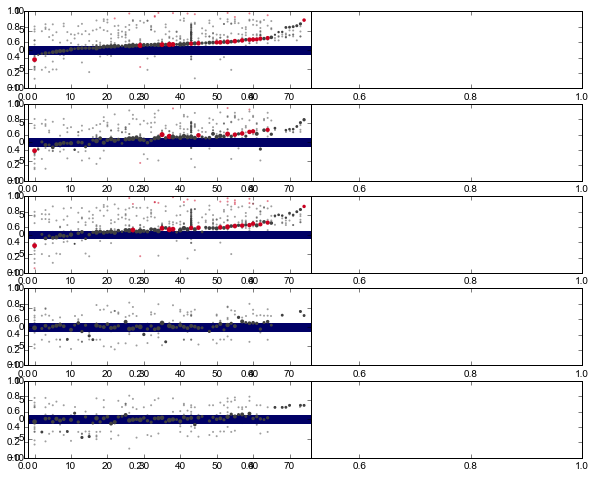

In [2191]:

# Phlen=10
# ATlen=10
# CClen=10
# TClen=10
# Glen=10
i=1
fig=plt.figure(1)
TotalWidth=Phlen+ATlen+CClen+TCLen+Glen

fig.set_size_inches(10,8)
gs = gridspec.GridSpec(5,TotalWidth+i*5)
for key in RSEM_Gene_Hash.keys():
    for pp,exKey in enumerate(['PlusN', 'MinusP', 'DSW','MinusN','PlusP']):
        if 'Q' in key and exKey in key:
            ax5=fig.add_subplot(gs[pp, :])
            ax1=fig.add_subplot(gs[pp, i:Phlen+i])
#             ax2=fig.add_subplot(gs[pp, Phlen+2*i:Phlen+ATlen+2*i])
#             ax3=fig.add_subplot(gs[pp, Phlen+ATlen+3*i:Phlen+ATlen+CClen+3*i])
#             ax4=fig.add_subplot(gs[pp, Phlen+ATlen+CClen+4*i:Phlen+ATlen+CClen+4*i+TClen])
#             ax7=fig.add_subplot(gs[pp, Phlen+ATlen+CClen+TClen+5*i:Phlen+ATlen+CClen+5*i+TClen+Glen])

            Phax, Phout,Phlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key ,'Lipid','Q_con_vs_R_PlusN',ax1)
#             ATuax, ATuout,ATlen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'ATP','Q_con_vs_R_PlusN',ax2)
#             CCmax, CCmout,CClen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Calvin Cycle','Q_con_vs_R_PlusN',ax3)
#             TCmax, TCmout,TClen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'TCA Cycle','Q_con_vs_R_PlusN',ax4)
#             Gmax, Gmout,Glen=Scatter_IsoG(RSEM_Gene_Hash, RSEM_Isoform_Hash, key, 'Glycolysis','Q_con_vs_R_PlusN',ax7)

#             if pp == 0:

#                 ax1.set_title('Photosynthesis', fontsize='x-large')
#                 ax2.set_title('ATP Synthesis', fontsize='x-large')
#                 ax3.set_title('Calvin Cycle', fontsize='x-large')
#                 ax4.set_title('TCA Cycle', fontsize='x-large')
#                 ax7.set_title('Glycolysis', fontsize='x-large')

            
#             if exKey != 'PlusP':            
#                 for ax in [ax1,ax2,ax3,ax4,ax7]:
#                     ax.axis('off')
#             else:
#                 for ax,lent in zip([ax1,ax2,ax3, ax4, ax7],[Phlen, ATlen, CClen, TClen, Glen]):
#                     ax.set_xticks(np.arange(0,lent,10))
#                     ax.spines['top'].set_visible(False)
#                     ax.spines['left'].set_visible(False)
#                     ax.spines['right'].set_visible(False)
#                     ax.get_yaxis().set_visible(False)
#                     ax.get_xaxis().tick_bottom()
#                     ax.patch.set_visible(False)
            
#             ax5.set_ylabel(exKey, fontsize='large')
#             ax5.axhline(y=0, c='k', ls='-', alpha=.7,zorder=0)
#             ax5.axhline(y=5, c='k', ls='--', alpha=.7,zorder=0)
#             ax5.axhline(y=-5, c='k', ls='--', alpha=.7,zorder=0)
#             ax5.set_yticks([-10,-5,0,5,10])
#             ax5.set_ylim([-10,10])
#             ax5.spines['top'].set_visible(False)
#             ax5.spines['right'].set_visible(False)
#             ax5.spines['bottom'].set_visible(False)
#             ax5.get_yaxis().tick_left()
#             ax5.get_xaxis().set_ticks([])

#             if exKey == 'MinusP':            
#                 ax.set_xticklabels(np.arange(0,lent,5))
#                 for exType, ax in zip([Nout, Pout, Cout, Hout],[ax1,ax2,ax3,ax4]):
#                     for ii,og in enumerate(exType):
#                         eList=gFHash[og]
#                         reList=filter(lambda x: x.startswith('Emihu1'), eList)
#                         eLab=reList[0]
#                         ax.text(ii,-10,eLab, rotation='vertical',va='center', ha='center')
            
# fig.savefig('MckewATP_Carbon.pdf')

## Compare data to McKew proteome study to look at overlap in sig. regulated genes? 

In [236]:
import string 
Mckew_protein_Counts=pd.read_excel('McKewSI.xlsx', header=2, index_col=0,dtypes='float64').dropna()
colstoDrop=[]
for x in Mckew_protein_Counts.index:
    if '/' in str(x):
        values=Mckew_protein_Counts.loc[x]
        xs=x.split('/')
        for i in xs:
            if len(str(i))>1:
                if str(i)[0].isdigit():
                    Mckew_protein_Counts.loc[i]=values
        colstoDrop.append(x)
    # Mckew_protein_Counts=Mckew_protein_Counts.drop(x)
Mckew_protein_Counts=Mckew_protein_Counts.drop(colstoDrop)
renameDict={}
for x in Mckew_protein_Counts.index:
    renameDict[x]='Emihu1|'+str(x).strip()
Mckew_protein_Counts=Mckew_protein_Counts.rename(index=renameDict)
Mckew_protein_Counts=Mckew_protein_Counts.drop_duplicates()

In [573]:
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

treatments=['NL','NL','NL','R','R','R','R', 'PL','PL','PL', 'PL']
Ns=['NL1', 'NL2', 'NL3']
Rs=['R1', 'R2', 'R3', 'R4']
Ps=['PL1', 'PL2', 'PL3', 'P4']

Mckew_protein_Countsew_FC_Sig=pd.DataFrame(index=Mckew_protein_Counts.index, 
                                           columns=['FC_NLvPL','FC_NLvR', 'FC_PLvR', 
                                                    'Sig_NLvPL','Sig_NLvR', 'Sig_PLvR',
                                                   'Up_NLvPL','Up_NLvR', 'Up_PLvR'])
#loop over df and report the significance of regulation for each of the datasets. Also report the mean fold change? 

for i,x in enumerate(Mckew_protein_Counts.index):
    #get the row of data
    data=Mckew_protein_Counts.loc[x]
    #run tukey with the groups = treatments
    results = pairwise_tukeyhsd(data, treatments)
    #fill in the sig (sig=True)
    Mckew_protein_Countsew_FC_Sig.loc[x,['Sig_NLvPL','Sig_NLvR', 'Sig_PLvR']]=results.reject
    #get the mean values 
    Nmean=Mckew_protein_Counts.loc[x, Ns].mean()
    Pmean=Mckew_protein_Counts.loc[x, Ps].mean()
    Rmean=Mckew_protein_Counts.loc[x, Rs].mean()
    #get the ratio of values
#     NdP=Nmean/Pmean
#     NdR=Nmean/Rmean
#     PdR=Pmean/Rmean
    NdP=np.log2(Nmean/Pmean)
    NdR=np.log2(Nmean/Rmean)
    PdR=np.log2(Pmean/Rmean)

    Mckew_protein_Countsew_FC_Sig.loc[x,['FC_NLvPL','FC_NLvR', 'FC_PLvR']]=[NdP, NdR, PdR]
    #higher in one v other
    NdP=Nmean>Pmean
    NdR=Nmean>Rmean
    PdR=Pmean>Rmean
    Mckew_protein_Countsew_FC_Sig.loc[x,['Up_NLvPL','Up_NLvR', 'Up_PLvR']]=[NdP, NdR, PdR]

In [574]:
Mckew_protein_Countsew_FC_Sig['OG']=np.nan
for x in Mckew_protein_Countsew_FC_Sig.index:
    if x in gFHash_inv.keys():
        og=gFHash_inv[x]
        Mckew_protein_Countsew_FC_Sig.loc[x,'OG']=og

In [1992]:
AllDif={}
for Gtype,t in zip([QvAll_C, QvAll_N, QvAll_P, QvAll_Hap],['C', 'N', 'P', 'H']):
    diffUp=set()
    diffDn=set()
    for x in Gtype:
        df=Gtype[x]
        gsetUp=df[df['OG']==1].index
        gsetDn=df[df['OG']==-1].index
        diffUp.update(gsetUp)
        diffDn.update(gsetDn)
        
    AllDif[t+'up']=diffUp
    AllDif[t+'dn']=diffDn

RSEM_Isoform_Hash['Q_con_vs_R_PlusN'].loc[gFHash[gFHash_inv['Emi219|CAMPEP_0187794284']]]
# gFHash[gFHash_inv['Emihu1|99026']]
# RSEM_Gene_Hash['Q_con']

,logFC,logCPM,PValue,FDR,GType
Emi374|CAMPEP_0187582754,2.436497,5.701788,0.014763,0.290022,None
Emi379|CAMPEP_0187617222,1.400892,5.781678,0.333433,0.912626,None
Emi370|CAMPEP_0187720400,1.889115,6.366632,0.058826,0.611833,None
Emi219|CAMPEP_0187794284,2.613557,7.721592,0.003602,0.130045,None
Emihu1|434976,2.313311,8.077541,0.010684,0.241010,None


In [2199]:
gI='Emihu1|463837'
print RSEM_Gene_Hash['Q_con_vs_R_PlusN'].loc[gFHash_inv[gI]]
print RSEM_Gene_Hash['Q_con_vs_V_MinusP'].loc[gFHash_inv[gI]]
print RSEM_Gene_Hash['Q_con_vs_X_PlusDSW'].loc[gFHash_inv[gI]]
RSEM_Isoform_Hash['Q_con_vs_X_PlusDSW'].loc[gFHash[gFHash_inv[gI]]]

logFC        -2.191556
logCPM        7.595002
PValue    6.992435e-05
FDR        0.003991264
GType             None
Name: OG1_5_1089, dtype: object
logFC       -1.871993
logCPM       7.588174
PValue    0.000288102
FDR        0.01043247
GType            None
Name: OG1_5_1089, dtype: object
logFC        -2.242199
logCPM        7.604056
PValue    1.381548e-05
FDR        0.001086559
GType             None
Name: OG1_5_1089, dtype: object


,logFC,logCPM,PValue,FDR,GType
Emi374|CAMPEP_0187597260,NaN,NaN,NaN,NaN,NaN
Emi374|CAMPEP_0187587128,-1.426151,2.605060,0.614329,0.982321,None
Emi374|CAMPEP_0187609822,-1.748391,3.076415,0.440231,0.982321,None
Emi379|CAMPEP_0187658766,6.202558,3.088258,0.068193,0.665972,None
Emi379|CAMPEP_0187637968,-4.923086,1.780475,0.329373,0.926765,None
Emi379|CAMPEP_0187654380,-2.664502,6.308152,0.032091,0.461853,None
Emi370|CAMPEP_0187679500,-3.190753,4.321410,0.070751,0.677267,None
Emi370|CAMPEP_0187724380,-4.695195,3.668873,0.039605,0.523006,None
Emi370|CAMPEP_0187718506,4.229181,1.945625,0.453364,0.982321,None
Emi370|CAMPEP_0187708972,-1.173254,1.758134,1.000000,1.000000,None


In [2164]:
TCAGenes

{'Emihu1|198024',
 'Emihu1|359239',
 'Emihu1|414497',
 'Emihu1|417078',
 'Emihu1|417649',
 'Emihu1|428425',
 'Emihu1|432409',
 'Emihu1|434751',
 'Emihu1|436533',
 'Emihu1|438455',
 'Emihu1|439301',
 'Emihu1|439403',
 'Emihu1|448597',
 'Emihu1|448908',
 'Emihu1|450594',
 'Emihu1|451022',
 'Emihu1|452597',
 'Emihu1|467883',
 'Emihu1|66604',
 'Emihu1|66621'}

In [576]:
Mckew_sig_byog=Mckew_protein_Countsew_FC_Sig.set_index('OG')

def PlotMckewSig_comp(df_in, geneHash,t):
    #input df and the set of genes you are interested in 
    outDF=pd.DataFrame(columns=['P','N'])

    for ud in ['up', 'dn']:
        df_t = df_in.loc[geneHash[t+ud]].dropna(how='all')
        df_t=df_t.drop_duplicates()
        for x,ind in enumerate(df_t.index):
            for np in ['N','P']:
                if df_t.iloc[x]['Sig_'+np+'LvR']==True:
                        if df_t.iloc[x]['Up_'+np+'LvR']==True:
                            outDF.loc[ind+ud, np]=1
                        else:
                            outDF.loc[ind+ud, np]=-1
                else: 
                    if ind in outDF.index:
                        if str(outDF.loc[ind+ud, np]).isdigit():
                            pass
                        else:
                            outDF.loc[ind+ud, np]=0
                    else: 
                        outDF.loc[ind+ud, np]=0
    return outDF
PlotMckewSig_comp(Mckew_sig_byog, AllDif, 'N')






,P,N
OG1_5_8176up,-1,1
OG1_5_3019up,0,0
OG1_5_7860up,0,-1
OG1_5_11710up,0,0
OG1_5_1659up,0,1
OG1_5_1624dn,0,0
OG1_5_13358dn,0,1
OG1_5_1952dn,0,1
OG1_5_5714dn,1,1
OG1_5_1326dn,0,0


In [577]:
Mckew_sig_byog.loc['OG1_5_1659']

FC_NLvPL       inf
FC_NLvR        inf
FC_PLvR        NaN
Sig_NLvPL     True
Sig_NLvR      True
Sig_PLvR     False
Up_NLvPL      True
Up_NLvR       True
Up_PLvR      False
Name: OG1_5_1659, dtype: object

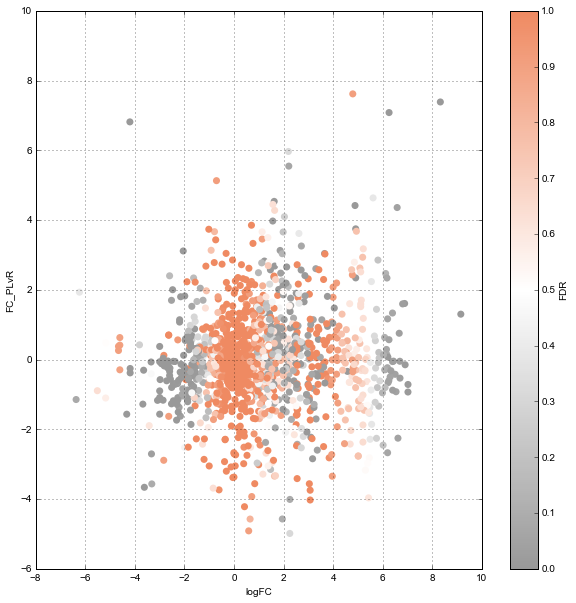

In [1937]:
test=Mckew_protein_Countsew_FC_Sig.set_index('OG')
test2=RSEM_Gene_Hash['Q_con_vs_V_MinusP']
test3=test2.join(test, how='outer')

test3.plot(kind='scatter', x='logFC', y='FC_PLvR', lw=0,  c='FDR', 
                     cmap=pal.colorbrewer.diverging.RdGy_3_r.get_mpl_colormap(), figsize=(10,10),s=50)

In [1320]:
geneSets=[RSEM_Gene_Hash['Q_con_vs_R_PlusN'], RSEM_Gene_Hash['Q_con_vs_V_MinusP'],RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']]
AllUp=set()
AllDn=set()
for df in geneSets:
    up=df[(df.FDR < 0.05)&(df.logFC>0)].index 
    dn=df[(df.FDR < 0.05)&(df.logFC<0)].index
    AllUp.update(up)
    AllDn.update(dn)

GeneList=[Car_og, Amino_og, Nucl_og, Cal_og, Hap_og, N_og, P_og]
GeneNames=['Carbon', 'Amino','Nucleotide',  'Calcification',  'Haploid','Nitrogen', 'Phosphorus']

SigCatGeneHash={}
for gset,gName in zip(GeneList,GeneNames):
    up=AllUp.intersection(gset)
    dn=AllDn.intersection(gset)
    SigCatGeneHash[gName]={'up':up, 'dn':dn}
    

def PlotMckew(inOGUp, inOGDn):
    upSig=Mckew_sig_byog.loc[inOGUp,['Sig_NLvR', 'Up_NLvR','Sig_PLvR', 'Up_PLvR']]
    dnSig=Mckew_sig_byog.loc[inOGDn,['Sig_NLvR', 'Up_NLvR','Sig_PLvR', 'Up_PLvR']]

    BoleanToColor(upSig)

def BoleanToColor(ogIn):
    NP=['NLvR', 'PLvR']
    d = {True:1, False:0, np.nan: -2}
    ogIn=ogIn.applymap(lambda x: d[x])
    print ogIn
    colors={'SigUpP':'#FF8E0B', 
            'SigUpN':'#FFBB0B', 
            'SigDnP':'#149BDD' , 
            'SigDnN':'#263CE2', 
            'NotSig':'grey', 
            'NotDetected': 'white'}
    colors=pd.DataFrame(columns=['Ncolor','Pcolor'])
    for n in NP: 
        for og in ogIn.index:
            sig=ogIn.loc[og,'Sig_'+n]
            up=ogIn.loc[og,'Up_'+n]
            if np.all(sig==-2):
                color=colors['NotDetected']
            elif np.all(sig==0):
                color=colors['NotSig']
            elif np.any(sig==1):
                if n.startswith('N'):
                    if np.any(up == 1):
                        color=colors['SigUpN']
                    else:
                        color=colors['SigDnN']
                elif n.startswith('P'):
                    if np.any(up == 1):
                        color=colors['SigUpP']
                    else:
                        color=colors['SigDnP']
            allCol[og]
        outcol[n]
            
#     for comp in ['PLvR','NLvR']:
#         for og in ogIn.index:
#             if og['Sig_'+comp]==False:
#                 print og
                
        
PlotMckew(SigCatGeneHash['Calcification']['up'], SigCatGeneHash['Calcification']['dn'])

             Sig_NLvR  Up_NLvR  Sig_PLvR  Up_PLvR
OG1_5_5840          0        0         0        1
OG1_5_3318          0        1         0        0
OG1_5_2050         -2       -2        -2       -2
OG1_5_1205         -2       -2        -2       -2
OG1_5_6176          0        1         0        1
OG1_5_4593          0        1         0        1
OG1_5_17276         0        1         0        0
OG1_5_3138          1        1         1        0
OG1_5_5401         -2       -2        -2       -2
OG1_5_38449        -2       -2        -2       -2
OG1_5_8355         -2       -2        -2       -2
OG1_5_2691         -2       -2        -2       -2
OG1_5_11133         0        0         1        0
OG1_5_1053         -2       -2        -2       -2


In [ ]:
fig.savefig('Comparison_McKewGenes.pdf')

In [ ]:
gFHash['OG1_5_9226']

In [ ]:
a=set(Genes_Uniq_Venn[('Emi374',)]).intersection(set(df.index))
d=df.loc[a]
for x in d[d.FDR<0.05].sort('logCPM', ascending=False).index:
    print gFHash[x][0]
    #.loc[Genes_Uniq_Venn[('Emi374',)]].sort('logCPM', ascending=False).iloc[0:25].index


###Notes about high responders: 
Up:
- OG1_5_18970 : Emihu1|461003 : Light harvesting protein 
- OG1_5_7910 : hypothetical protein : 
- OG1_5_52456 :hypothetical
- OG1_5_38368 : hypothetical
- OG1_5_18828
- OG1_5_1027 : actin 
- OG1_5_1045 : alpha-tubulin

Down: 
- OG1_5_20158 : Keratin? 
- OG1_5_21653 : inodole acetmide hydrolase: phytohormone creation? 
- OG1_5_45215 :ferredoxin component
- OG1_5_1124: senescence putative
- OG1_5_3087 : senescence protein 
- OG1_5_22120 : ART3 from yeast???
- OG1_5_2309 : ART3?? 
- OG1_5_3363 : ferredoxin ubiquitin 
- OG1_5_8862 : Dephospho-CoA kinase
- OG1_5_1008 : Molecular chaperones HSP70/HSC70, HSP70 superfamily	
- OG1_5_35815 : secreted protein ? putative

In [118]:
RSEM_ISO_Hash={}
for fileIn in glob.glob('E*isoforms.results'):
    key=fileIn.split('_')[0]
    df=pd.read_table(fileIn)
    RSEM_ISO_Hash[key]=df
    df['strain']=df['transcript_id'].map(lambda x: x.split('|')[0])

In [119]:
summedTPM_bySpecies_hash={}
for key in RSEM_ISO_Hash.keys():
    if ('E3' in key and 'Z' in key)|('E1' in key)|('E2' in key):
        df=RSEM_ISO_Hash[key]
        newdf=pd.DataFrame(df.groupby(['strain', 'gene_id']).sum().TPM).reset_index().pivot(index='gene_id',columns='strain', values='TPM')
        colNames=newdf.columns
        newName=[key+'_'+x for x in colNames]
        newdf=newdf.rename(columns=dict(zip(colNames,newName)))   
        summedTPM_bySpecies_hash[key]=newdf

In [120]:
summedEC_bySpecies_hash={}
for key in RSEM_ISO_Hash.keys():
    if ('E3' in key and 'Z' in key)|('E1' in key)|('E2' in key):
        df=RSEM_ISO_Hash[key]
        newdf=pd.DataFrame(df.groupby(['strain', 'gene_id']).sum().expected_count).reset_index().pivot(index='gene_id',columns='strain', values='expected_count')
        colNames=newdf.columns
        newName=[key+'_'+x for x in colNames]
        newdf=newdf.rename(columns=dict(zip(colNames,newName)))   
        summedEC_bySpecies_hash[key]=newdf

In [121]:
import functools

merge = functools.partial(pd.merge, left_index=True, right_index=True, how='inner')
All_Genes_summedbyStrain = functools.reduce(merge, summedTPM_bySpecies_hash.values())
All_Genes_summedbyStrainEC = functools.reduce(merge, summedEC_bySpecies_hash.values())


In [828]:
Core_Genes_summedbyStrain=All_Genes_summedbyStrain.dropna()
Core_Genes_summedbyStrainEC=All_Genes_summedbyStrainEC.dropna()

In [1456]:
Names=Core_Genes_summedbyStrain.sum().reset_index().strain.str.split('_',return_type='frame').set_index(Core_Genes_summedbyStrain.sum().index)
test=pd.DataFrame(Core_Genes_summedbyStrain.sum(),columns=['summed'])

SummedData=Names.join(test)
# SummedData.summed=SummedData.summed.astype('float')
# SummedData['percent']=0
# for z in insitu:
#     s= SummedData.loc[z].sum()
#     SummedData[z,'percent']= SummedData.loc[z, 'summed']/s.loc['summed']

In [1685]:
s=SummedData.groupby(0).sum()
SummedData['percent']=0
for i in s.index:
     for g in [y for y in SummedData.index if y.startswith(i)]:
        a=SummedData.loc[g, 'summed']/s.loc[i]
        SummedData.loc[g,'percent']=a['summed']

insitu=list(set([y for y in SummedData.index if 'Z' in y]))
E2=list(set([y for y in SummedData.index if ('E2' in y) & ('Z' not in y)]))
E1=list(set([y for y in SummedData.index if ('E1' in y) & ('Z' not in y)]))


In [1632]:
singSpe[::-1]

Index([u'Emihu1', u'Emi379', u'Emi374', u'Emi370', u'Emi219'], dtype='object')

In [1637]:
e

'Emihu1'

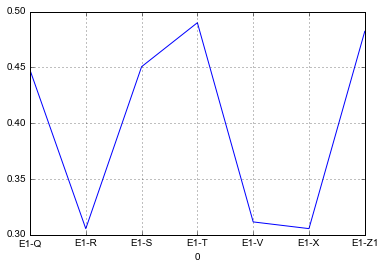

In [1605]:
data[d].plot()

NameError: name 'singlespecies' is not defined

In [1543]:
orderPercent.columns

Index([u'Emi219', u'Emi370', u'Emi374', u'Emi379', u'Emihu1'], dtype='object')

In [829]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression


In [830]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt


In [831]:
Genes_PCA=Core_Genes_summedbyStrain.T
y=Genes_PCA.index
X=Genes_PCA

In [832]:
pca=PCA()
Xc=pca.fit_transform(scale(X))

In [833]:
print pca.explained_variance_ratio_[:2]
df=pd.DataFrame(Xc)


[ 0.20489948  0.08132611]


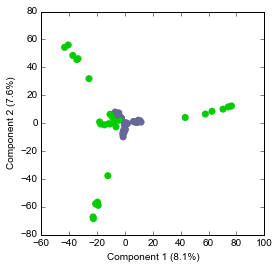

In [834]:
color_ind=pal.colorbrewer.qualitative.Set2_6.hex_colors
del color_ind[4]
# specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
color_ind=['#666699', '#00CC00', 'y', 'k']
specColorKey={'Q':0, 'S':0, 'T':0, 'Z':0, 'R':1, 'V':1, 'X':1}#key to convert name to list
scatterColor=[]
for name in y:
#     scatterColor.append(color_ind[specColorKey[name[-6:]]])
    scatterColor.append(color_ind[specColorKey[name[3]]])
fig,ax=plt.subplots(1)

ax.set_aspect('equal')

df.plot(kind='scatter', x=1, y=2, c=scatterColor, lw=0, s=50, grid=False,ax=ax)
ax.set_xlabel('Component 1 (%0.1f%%)'% (pca.explained_variance_ratio_[1]*100))
ax.set_ylabel('Component 2 (%0.1f%%)'% (pca.explained_variance_ratio_[2]*100))


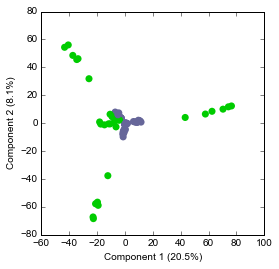

In [835]:
color_ind=pal.colorbrewer.qualitative.Set2_6.hex_colors
del color_ind[4]
# specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
color_ind=['#666699', '#00CC00', 'y', 'k']
specColorKey={'Q':0, 'S':0, 'T':0, 'Z':0, 'R':1, 'V':1, 'X':1}#key to convert name to list
scatterColor=[]
for name in y:
#     scatterColor.append(color_ind[specColorKey[name[-6:]]])
    scatterColor.append(color_ind[specColorKey[name[3]]])
fig,ax=plt.subplots(1)

ax.set_aspect('equal')

df.plot(kind='scatter', x=1, y=2, c=scatterColor, lw=0, s=50, grid=False,ax=ax)
ax.set_xlabel('Component 1 (%0.1f%%)'% (pca.explained_variance_ratio_[0]*100))
ax.set_ylabel('Component 2 (%0.1f%%)'% (pca.explained_variance_ratio_[1]*100))


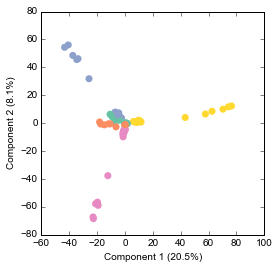

In [839]:
color_ind=pal.colorbrewer.qualitative.Set2_6.hex_colors
del color_ind[4]
specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
# color_ind=['#666699', '#00CC00']
# specColorKey={'Q':0, 'S':0, 'T':0, 'Z':0, 'R':1, 'V':1, 'X':1}#key to convert name to list

scatterColor=[]
for name in y:
    scatterColor.append(color_ind[specColorKey[name[-6:]]])
#     scatterColor.append(color_ind[specColorKey[name[3]]])
fig,ax=plt.subplots(1)
ax.set_aspect('equal')
df.plot(kind='scatter', x=1, y=2, c=scatterColor, lw=0, s=50, grid=False,ax=ax)
ax.set_xlabel('Component 1 (%0.1f%%)'% (pca.explained_variance_ratio_[0]*100))
ax.set_ylabel('Component 2 (%0.1f%%)'% (pca.explained_variance_ratio_[1]*100))


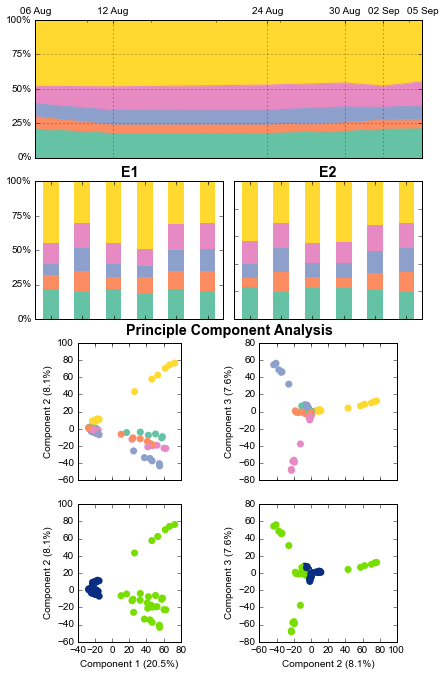

In [2144]:
from matplotlib.ticker import FuncFormatter 

def myfunc(x, pos=0): 
    return '%1.0f%%'%(100*x) 

import matplotlib.dates as mdates
Names=Core_Genes_summedbyStrain.sum().reset_index().strain.str.split('_',return_type='frame').set_index(Core_Genes_summedbyStrain.sum().index)
test=pd.DataFrame(Core_Genes_summedbyStrain.sum(),columns=['summed'])

SummedData=Names.join(test)

s=SummedData.groupby(0).sum()
SummedData['percent']=0
for i in s.index:
     for g in [y for y in SummedData.index if y.startswith(i)]:
        a=SummedData.loc[g, 'summed']/s.loc[i]
        SummedData.loc[g,'percent']=a['summed']

insitu=list(set([y for y in SummedData.index if 'Z' in y]))
E2=list(set([y for y in SummedData.index if ('E2' in y) & ('Z' not in y)]))
E1=list(set([y for y in SummedData.index if ('E1' in y) & ('Z' not in y)]))




fig=plt.figure(figsize=(6,9))
gs=gridspec.GridSpec(8,8)
ax=fig.add_subplot(gs[0:2, :])
plt.tight_layout()
color_ind=pal.colorbrewer.qualitative.Set2_6.hex_colors
del color_ind[4]
specColorKey={'Emi219':color_ind[0], 'Emi370':color_ind[1], 'Emi374':color_ind[2], 'Emi379':color_ind[3], 'Emihu1':color_ind[4]}#key to convert name to list

DateDic={'E1-Z1' : datetime.date(2012, 8, 6), 'E1-Z4' : datetime.date(2012, 8, 12),
        'E2-Z5' : datetime.date(2012, 8, 24), 'E2-Z9' : datetime.date(2012, 8, 30),
        'E3-Z10' : datetime.date(2012, 9, 2), 'E3-Z11' : datetime.date(2012, 9, 5)}

dates=[DateDic[i] for i.split('_')[0] in insitu]

###PLOT INSITU

orderPercent=SummedData.loc[insitu].pivot(index=0, columns=1,values='percent')
orderPercent=orderPercent.T.rename(columns=DateDic).T
singSpe=orderPercent.columns
colors=[specColorKey[x] for x in orderPercent.columns]
orderPercent.plot(kind='area', colors=colors, legend=False,
                  xticks=orderPercent.index, ax=ax, yticks=[0,.25,.5,.75,1])
myFmt = mdates.DateFormatter('%d %b')

ax2=fig.add_subplot(gs[2:4, 0:4])
ax3=fig.add_subplot(gs[2:4, 4:])

##PLOT E1

orderPercent=SummedData.loc[E1].pivot(index=0, columns=1,values='percent')
singSpe=orderPercent.columns
colors=[specColorKey[x] for x in orderPercent.columns]
orderPercent.plot(kind='bar', stacked=True, colors=colors, grid=False, legend=False
                  ,ax=ax2, lw=0, yticks=[0,.25,.5,.75,1])

##PLOT E2

orderPercent=SummedData.loc[E2].pivot(index=0, columns=1,values='percent')
singSpe=orderPercent.columns
colors=[specColorKey[x] for x in orderPercent.columns]
orderPercent.plot(kind='bar', stacked=True, colors=colors, grid=False, legend=False
                  ,ax=ax3, lw=0)

ax.yaxis.set_major_formatter(FuncFormatter(myfunc)) 
ax2.yaxis.set_major_formatter(FuncFormatter(myfunc)) 
Treatments=['Con', '+N', '+P', '-N', '-P', '+DSW']
ax2.set_xticklabels(Treatments, rotation=0)
ax3.set_xticklabels(Treatments, rotation=0)
ax2.set_title('E1', fontsize='x-large', fontweight='bold')
ax3.set_title('E2', fontsize='x-large', fontweight='bold')

ax3.set_yticklabels('')

ax4=fig.add_subplot(gs[4:6, 0:4])
ax5=fig.add_subplot(gs[4:6, 4:])
ax6=fig.add_subplot(gs[6:, 0:4])
ax7=fig.add_subplot(gs[6:, 4:])

Genes_PCA=Core_Genes_summedbyStrain.T
y=Genes_PCA.index
X=Genes_PCA
pca=PCA()
Xc=pca.fit_transform(scale(X))
df=pd.DataFrame(Xc)


color_ind=pal.colorbrewer.qualitative.Set2_6.hex_colors
del color_ind[4]
specColorKey={'Emi219':0, 'Emi370':1, 'Emi374':2, 'Emi379':3, 'Emihu1':4}#key to convert name to list
# color_ind=['#666699', '#00CC00']
# specColorKey={'Q':0, 'S':0, 'T':0, 'Z':0, 'R':1, 'V':1, 'X':1}#key to convert name to list
scatterColor=[]
y=Genes_PCA.index

for name in y:
    scatterColor.append(color_ind[specColorKey[name[-6:]]])
#     scatterColor.append(color_ind[specColorKey[name[3]]])

for i,axs in enumerate([ax4,ax5]):
    axs.set_aspect('equal')
    df.plot(kind='scatter', x=i, y=i+1, c=scatterColor, lw=0, s=50, grid=False,ax=axs)
    axs.set_xlabel('Component '+ str(i+1) +   ' (%0.1f%%)'% (pca.explained_variance_ratio_[i]*100))
    axs.set_ylabel('Component '+ str(i+2) +   ' (%0.1f%%)'% (pca.explained_variance_ratio_[i+1]*100))
#     axs.set_title('Component '+ str(i+1) +' vs. '+ str(i+2))
    
color_ind=['#082D81','#77DE00',  'y', 'k']
specColorKey={'Q':0, 'S':0, 'T':0, 'Z':0, 'R':1, 'V':1, 'X':1}#key to convert name to list
scatterColor=[]
for name in y:
#     scatterColor.append(color_ind[specColorKey[name[-6:]]])
    scatterColor.append(color_ind[specColorKey[name[3]]])

    
for i,axs in enumerate([ax6,ax7]):
    axs.set_aspect('equal')
    df.plot(kind='scatter', x=i, y=i+1, c=scatterColor, lw=0, s=50, grid=False,ax=axs)
    axs.set_xlabel('Component '+ str(i+1) +   ' (%0.1f%%)'% (pca.explained_variance_ratio_[i]*100))
    axs.set_ylabel('Component '+ str(i+2) +   ' (%0.1f%%)'% (pca.explained_variance_ratio_[i+1]*100))

gs2=gridspec.GridSpec(2,2)
ax9=fig.add_subplot(gs2[1:,:])
ax9.axis('off')
ax9.set_title('Principle Component Analysis', fontsize='x-large',fontweight='bold', position=[0.5,1.175])

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.tick_top()

fig.savefig('../Figures/v1/PrincipleComponentAnalysis.pdf')

In [1703]:
orderPercent=SummedData.loc[insitu].pivot(index=0, columns=1,values='percent')
orderPercent=orderPercent.T.rename(columns=DateDic).T

1,Emi219,Emi370,Emi374,Emi379,Emihu1
0,,,,,
2012-08-06,0.206549,0.089381,0.094606,0.127142,0.482321
2012-08-12,0.174462,0.061136,0.106676,0.171313,0.486413
2012-08-24,0.174890,0.060954,0.108762,0.182153,0.473242
2012-08-30,0.189305,0.061330,0.116256,0.174711,0.458398
2012-09-02,0.204902,0.067734,0.091348,0.155283,0.480732
2012-09-05,0.207577,0.067088,0.100727,0.174760,0.449847


In [1842]:
Chlorophyll=pd.read_excel('APA.xlsx',sheetname='Chlorophyll')
APA=pd.read_excel('APA.xlsx',sheetname='APA')

In [1843]:
Chl_mean=Chlorophyll.groupby('Treatment').mean()
Chl_std=APA.groupby('Treatment').std()

In [1844]:
APA_mean=APA.groupby('Treatment').mean()
APA_std=APA.groupby('Treatment').std()

In [1845]:
APAChlMean=APA_mean/Chl_mean
ApAChlerr=((APA_std**2)+(Chl_std**2))**.5

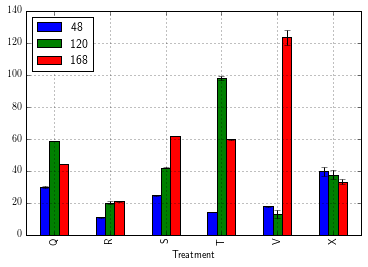

In [1917]:
APAChlMean.plot(yerr=ApAChlerr, kind='bar')


In [1847]:

Averaged=(APA[[48, 120, 168]]/Chlorophyll[[48, 120, 168]]).join(APA.Treatment).groupby('Treatment').mean()
STD=(APA[[48, 120, 168]]/Chlorophyll[[48, 120, 168]]).join(APA.Treatment).groupby('Treatment').std()

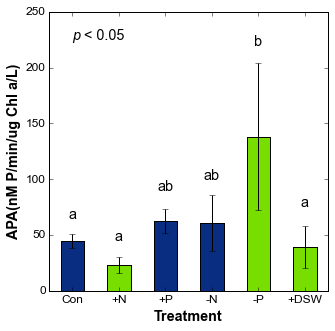

In [1931]:
from matplotlib import rc
fig,ax=plt.subplots(1)
Averaged[168].plot(yerr=STD, kind='bar', ylim=[0,250], figsize=[5,5], 
                   colors=['#082D81','#77DE00', '#082D81','#082D81','#77DE00','#77DE00'], ax=ax, grid=False)
ax.set_xticklabels(Treatments, rotation=0, fontsize='large')
ax.set_yticklabels(np.arange(0,300,50),fontsize='large')
ax.set_xlabel('Treatment', fontsize='x-large', fontweight='bold')
ax.set_ylabel('APA(nM P/min/ug Chl a/L)', fontsize='x-large', fontweight='bold')

ax.text(0,65, 'a', fontsize='x-large', ha='center')
ax.text(1,45, 'a', fontsize='x-large', ha='center')
ax.text(2,90, 'ab', fontsize='x-large', ha='center')
ax.text(3,100, 'ab', fontsize='x-large', ha='center')
ax.text(4,220, 'b', fontsize='x-large', ha='center')
ax.text(5,75, 'a', fontsize='x-large', ha='center')
ax.text(0,225, 'p', fontsize='x-large', fontstyle='italic')
ax.text(0.25,225, '< 0.05', fontsize='x-large', )

fig.savefig('../Figures/APAperChlorophy.pdf')

In [1899]:
data=APA[[168]]/Chlorophyll[[168]]
treatments = Chlorophyll['Treatment']
results=pairwise_tukeyhsd(data, treatments)
results.summary()

results.variance

926.61289198970564

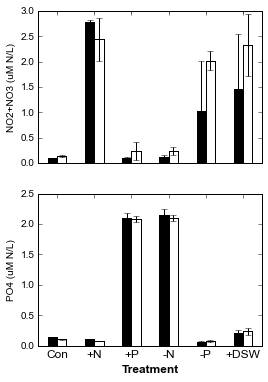

In [2143]:
fig,ax=plt.subplots(2)
fig.set_size_inches(4,6)
data=pd.read_excel('Nutrients.xlsx')
MeanNut=data.groupby(by='index', level=0).mean()
STDNut=data.groupby(by='index', level=0).std()

MeanNut[['E1NO23','E2NO23']].plot(kind='bar',yerr=STDNut, ax=ax[0], 
                                  legend=False, grid=False,colors=['k','w'])
MeanNut[['E1PO4','E2PO4']].plot(kind='bar',yerr=STDNut, ax=ax[1], legend=False, grid=False,colors=['k','w'])

ax[0].set_ylabel('NO2+NO3 (uM N/L)')
ax[1].set_ylabel('PO4 (uM N/L)')

ax[1].set_xlabel('Treatment', fontsize='large', fontweight='bold')
ax[1].set_xticklabels(Treatments, rotation=0, fontsize='large')

fig.savefig('../Figures/v1/SupplementalFigure_nutrients.pdf')

In [2098]:
MeanNut['NO23']/MeanNut['PO4']

E1Q     0.666667
E1R    25.242424
E1S     0.047619
E1T     0.058915
E1V    14.761905
E1X     6.753846
E2Q     1.312500
E2R    31.869565
E2S     0.113600
E2T     0.111111
E2V    26.347826
E2X     9.845070
dtype: float64

In [509]:
import scipy

In [1839]:
Q=data.iloc[0:3]
R=Q=data.iloc[3:6]
S=Q=data.iloc[6:9]
T=Q=data.iloc[9:12]
V=Q=data.iloc[12:15]
X=Q=data.iloc[15:18]

out=scipy.stats.f_oneway(Q, R, S, T, V, X)


In [879]:
RSEM_Gene_Hash['Q_con_vs_R_PlusN'].loc[gFHash_inv['Emihu1|456474']]

logFC       6.718005
logCPM      3.353578
PValue    0.01066604
FDR        0.1451511
GType           None
Name: OG1_5_3365, dtype: object

In [846]:
gFHash[gFHash_inv['Emihu1|210920']]

['Emi370|CAMPEP_0187732902', 'Emihu1|210920']

In [849]:
Ngenes=='Emihu1|220023'

False

In [787]:
summedTPM_bySpecies_hash={}
for key in RSEM_ISO_Hash.keys():
    if ('E3' in key and 'Z' in key)|('E1' in key)|('E2' in key):
        df=RSEM_ISO_Hash[key]
        newdf=pd.DataFrame(df.groupby(['strain', 'gene_id']).sum().TPM).reset_index().pivot(index='gene_id',columns='strain', values='TPM')
        colNames=newdf.columns
        newName=[key+'_'+x for x in colNames]
        newdf=newdf.rename(columns=dict(zip(colNames,newName)))   
        summedTPM_bySpecies_hash[key]=newdf

In [792]:
merge = functools.partial(pd.merge, left_index=True, right_index=True, how='inner')
All_Genes_summedbyStrain = functools.reduce(merge, summedTPM_bySpecies_hash.values())
All_Genes_summedbyStrainEC = functools.reduce(merge, summedEC_bySpecies_hash.values())


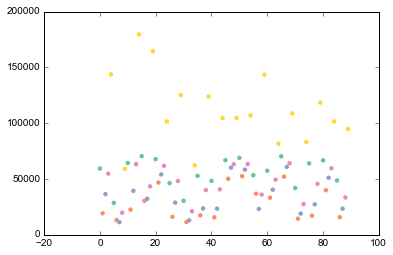

In [823]:
x=All_Genes_summedbyStrain.dropna().sum()
plt.scatter(range(90),x, lw=0, marker='o', c=scatterColor)